# Feature Assessment 

In [3]:
from scipy.stats.stats import pearsonr

import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from regressors import stats

# import numpy as np
# from sklearn import datasets
# boston = datasets.load_boston()
# which_betas = np.ones(13, dtype=bool)
# which_betas[3] = False  # Eliminate dummy variable
# X = boston.data[:, which_betas]
# y = boston.target

In [4]:
np.set_printoptions(precision=4, suppress=True)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

First, we import the dataset we made in our previous notebook.

In [6]:
df = pd.read_csv('/Users/desert/desert_workspace/desert_data/clean_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.fillna(0)

df.head()

,County,num_tracts,n_food_des,n_urban,n_rural,urban_des,rural_des,Rural,Urban,LILATracts_1And10,...,Varicella Hospitalizations,opiods_rx_1000,opiods_greater_than_stateavg,MILK_PRICE10,SODA_PRICE10,MILK_SODA_PRICE10,PCH_FFR_07_12,FFR07,FFR12,pop2010_in_des
0,Alameda,360.0,15.0,354.0,6.0,15.0,0.0,0.016667,0.983333,0.041667,...,0.132,557.20,0,1.122215,1.164422,0.891575,8.902878,1112.0,1211,56082.0
1,Alpine,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.000,578.68,0,1.032918,1.089488,0.877073,-50.000000,2.0,1,0.0
2,Amador,9.0,0.0,0.0,9.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.000,1244.76,1,1.032918,1.089488,0.877073,-5.555556,18.0,17,0.0
3,Butte,51.0,14.0,38.0,13.0,13.0,1.0,0.254902,0.745098,0.274510,...,0.455,1389.20,1,0.996443,1.130546,0.815374,2.684564,149.0,153,58979.0
4,Calaveras,10.0,0.0,2.0,8.0,0.0,0.0,0.800000,0.200000,0.000000,...,0.000,1068.98,1,1.032918,1.089488,0.877073,-7.407407,27.0,25,0.0


In [84]:
list(df.columns)

['County',
 'num_tracts',
 'n_food_des',
 'n_urban',
 'n_rural',
 'urban_des',
 'rural_des',
 'Rural',
 'Urban',
 'LILATracts_1And10',
 'high_food_des_prev',
 'cnty_obesity_pct',
 'cnty_obesity_pct_adj',
 'cnty_dm_pct',
 'cnty_dm_pct_adj',
 'cnty_inactive_pct',
 'cnty_inactive_pct_adj',
 'POP2010',
 'OHU2010',
 'NUMGQTRS',
 'HUNVFlag',
 'Adolescent_births',
 'ABR',
 'p_hs_edatt',
 'PC_PHYS_R',
 'DENTIST_R',
 'PSYCH_R',
 'PCT_HSPNC',
 'PCT_WHITE',
 'PCT_BLACK',
 'PCT_ASIAN',
 'PCT_AMIND_ESK',
 'PCT_ISLANDER',
 'PCT_MULTI',
 'PCT_OTHER',
 'PCT_65OVER',
 'PCT_18_64',
 'PCT_UNDR18',
 'PCT_UNDER5',
 'des_percent',
 'unemployment_rate',
 'n_hospitals',
 'mort_30_ami',
 'mort_30_cabg',
 'mort_30_copd',
 'mort_30_hf',
 'mort_30_pn',
 'mort_30_stk',
 'readm_30_ami',
 'readm_30_cabg',
 'readm_30_copd',
 'readm_30_hf',
 'readm_30_hip_knee',
 'readm_30_hosp_wide',
 'readm_30_pn',
 'readm_30_stk',
 'Chlamydia',
 'Tuberculosis',
 'Gonorrhea',
 'HIV',
 'senior_flu_deaths',
 'Measles',
 'Mumps',
 'Per

In [7]:
df.rename(columns={'Influenza Death (<65 years of age)':'senior_flu_deaths'}, inplace=True)
df.rename(columns={'Varicella Hospitalizations':'varicella_hospitalizations'}, inplace=True)

In [8]:
df[['pop2010_in_des','des_percent']].describe()
df['at_risk'] = (df['pop2010_in_des'] >= 21217) & (df['des_percent']>=0.079662)
df['at_risk'] =df['at_risk'].astype(int)

In [55]:
cols=df.columns.tolist()
cols = [col for col in cols if col != 'County']
exclude = ['County','n_food_des','rural_des','urban_des','pop2010_in_des','LILATracts_1And10','des_percent','cnty_obesity_pct','cnty_inactive_pct','cnty_dm_pct', 'high_food_des_prev','at_risk','MILK_SODA_PRICE10','n_rural','n_urban','Adolescent_births','PCH_FFR_07_12']
target = 'n_food_des' 
predictors = [column for column in cols if column not in exclude]
#predictors = ['num_tracts','opiods_rx_1000','SODA_PRICE10']
X = df[predictors].values
y = np.array(df[target])#.reshape(-1,1)
ols = linear_model.LinearRegression()
ols.fit(X, y)

print 'sse\n', stats.sse(ols, X, y)
print 'r2\n', stats.adj_r2_score(ols, X, y)
print 'standard error of beta coeffs\n', stats.coef_se(ols, X, y)
print 't values of beta coeffs\n',stats.coef_tval(ols, X, y)
print 'p values of beta coeffs\n', stats.coef_pval(ols, X, y)
print 'f stat of beta coeffs\n', stats.f_stat(ols, X, y)

xlabels=df[predictors].columns

sse
9.39473452371e-16
r2
1.0
standard error of beta coeffs
[ 0.0134+0.j  0.0000+0.j  0.0125+0.j  0.0120+0.j  0.0000+0.j  0.0000+0.j
  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j
  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j
  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j
  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000-0.j
  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000-0.j  0.0000+0.j  0.0000+0.j
  0.0000+0.j  0.0000+0.j  0.0000-0.j  0.0000-0.j  0.0000-0.j  0.0000+0.j
  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000+0.j  0.0000-0.j  0.0000+0.j
  0.0000+0.j  0.0000-0.j  0.0000+0.j  0.0000+0.j  0.0037+0.j  0.0000+0.j
  0.0000+0.j  0.0001-0.j  0.0000+0.j  0.0037+0.j  0.0000+0.j  0.0000+0.j]
t values of beta coeffs
[  3.2508e+04 -1.9079e-09j  -2.9267e+08 +3.4134e+06j
  -2.0268e+03 +3.0126e-11j   2.1153e+03 -2.9108e-11j
   5.9270e+05 -3.8233e-01j   3.4335e+06 -3.9293e-02j
   4.8997e+07 -9.7880e+01j 

In [56]:
stats.summary(ols, X, y, xlabels)

Residuals:
Min   1Q  Median   3Q  Max
-0.0 -0.0     0.0  0.0  0.0


Coefficients:
                                Estimate     Std. Error                          t value  p value
_intercept                    435.908538  (0.013409+0j)                  (32507.8742-0j)      0.0
num_tracts                     -0.229082             0j     (-292674204.009+3413420.37j)      0.0
Rural                         -25.374977   (0.01252+0j)                  (-2026.8019+0j)      0.0
Urban                          25.374978  (0.011996+0j)                   (2115.2592-0j)      0.0
cnty_obesity_pct_adj            0.217172             0j            (592697.0971-0.3823j)      0.0
cnty_dm_pct_adj                 8.240064     (2e-06+0j)           (3433450.4576-0.0393j)      0.0
cnty_inactive_pct_adj           3.973875             0j         (48996526.6904-97.8795j)      0.0
POP2010                        -0.000086             0j  (-731917885.322+124331607.885j)      0.0
OHU2010                         0.00

In [57]:
lr = smf.ols(formula='n_food_des ~ num_tracts+opiods_rx_1000+SODA_PRICE10', data=df).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_food_des   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     20.65
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           4.82e-09
Time:                        10:05:38   Log-Likelihood:                -212.55
No. Observations:                  58   AIC:                             433.1
Df Residuals:                      54   BIC:                             441.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         30.7723     54.474      0.565      0.574       -78.441   139.986
num_tracts         0.0288      0.004      6.649      0.000         0.020     0.037
opiods_rx_1000    -0.0046      0.004     -1.135      0.261        -0.013     0.004
SODA_PRICE10     -19.0044     48.058     -0.395      0.694      -115.355    77.347
==============================================================================
Omnibus:                       58.673   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.189
Skew:                           2.812   Prob(JB):                     4.95e-75
Kurtosis:                      13.487   Cond. No.                     5.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

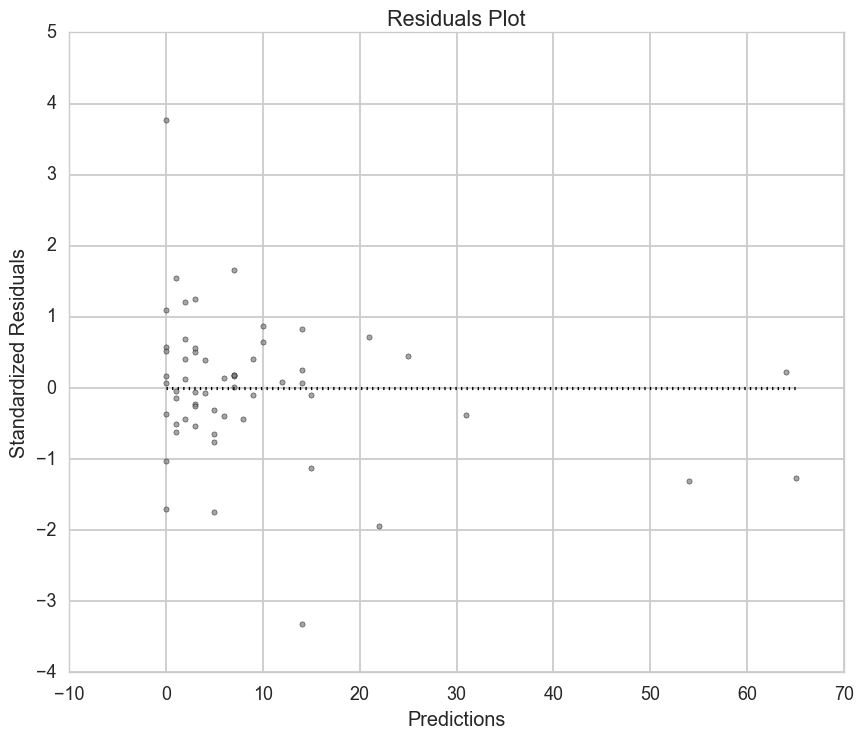

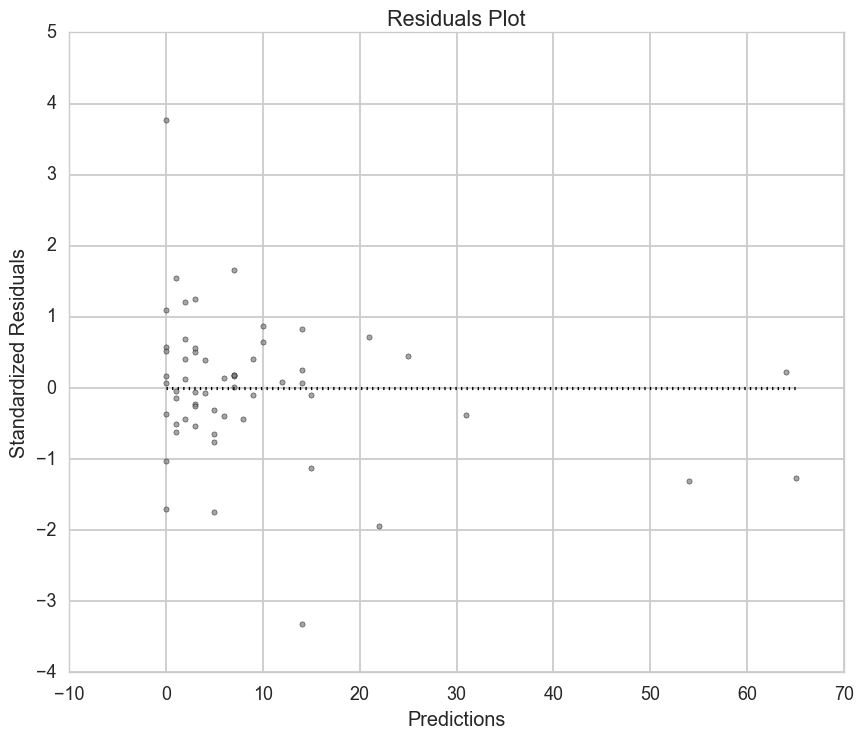

In [58]:
from regressors import plots
plots.plot_residuals(ols, X, y, r_type='standardized')

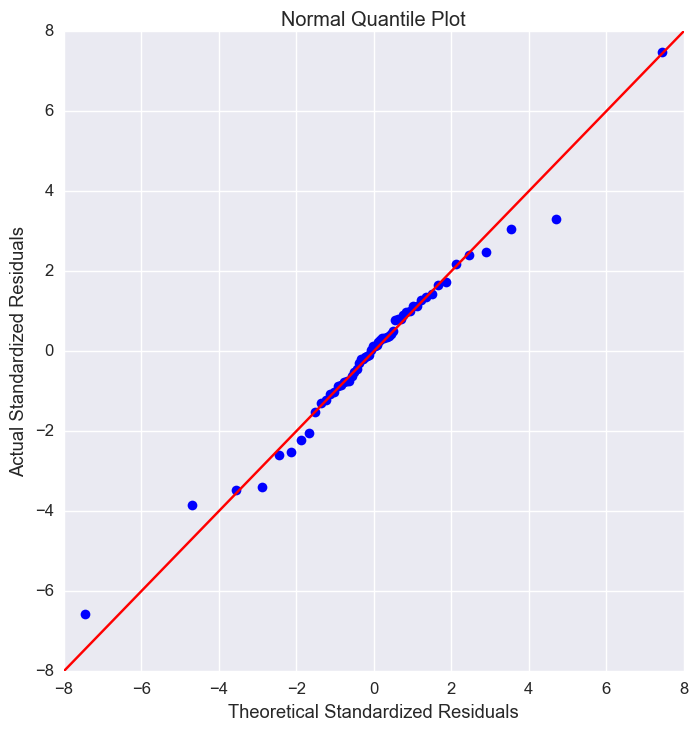

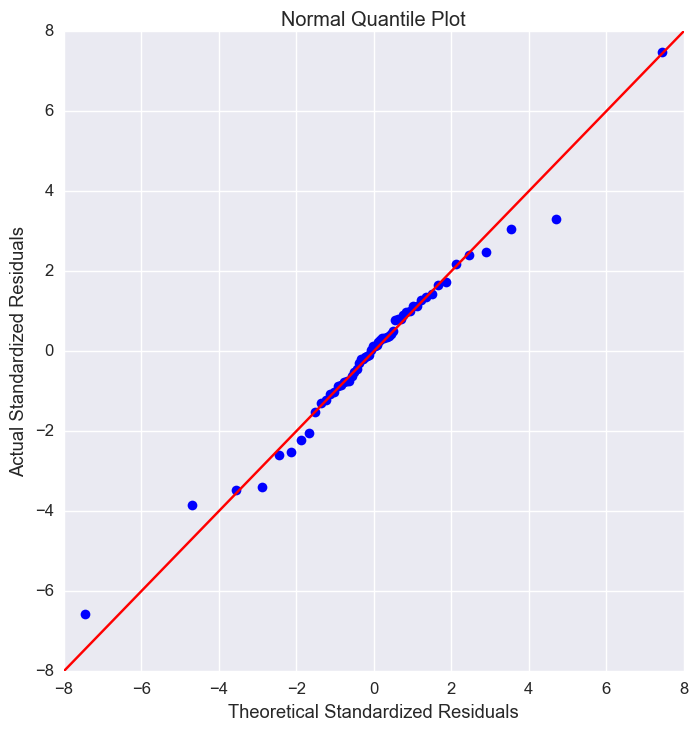

In [59]:
plots.plot_qq(ols, X, y, figsize=(8, 8))

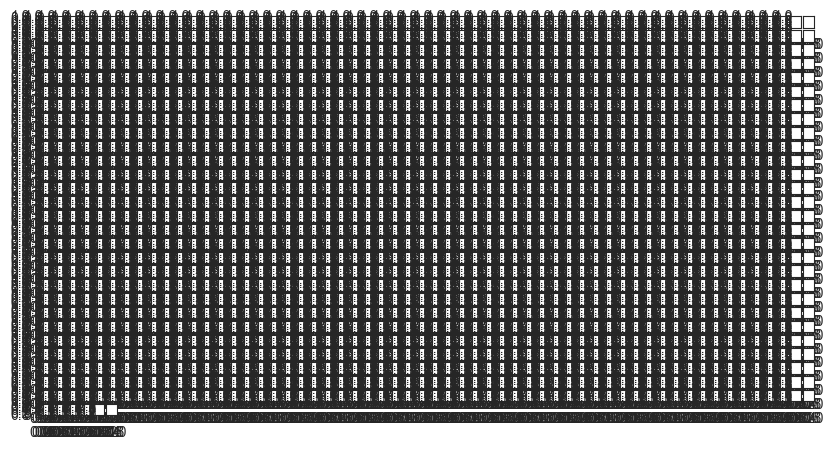

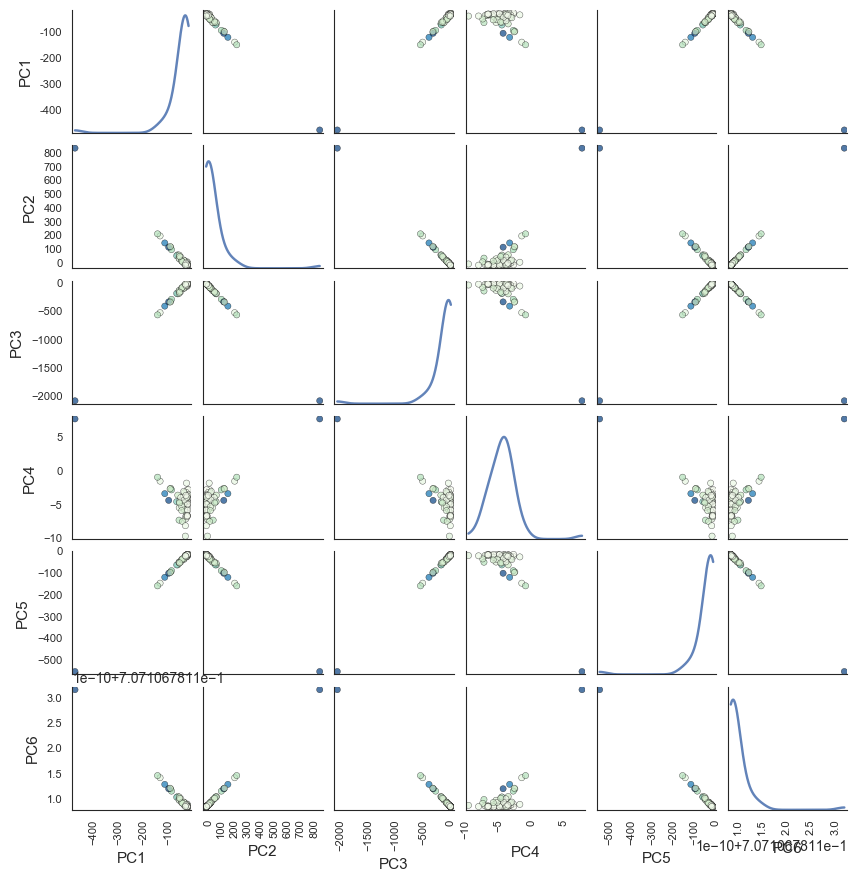

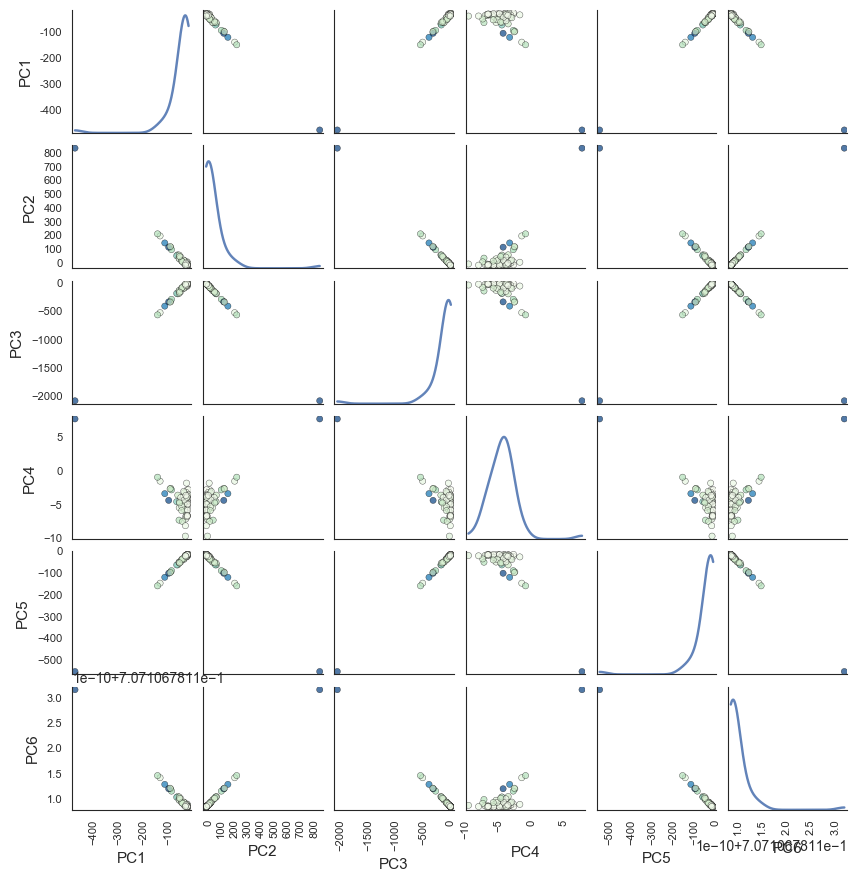

In [73]:
from sklearn import preprocessing
from sklearn import decomposition


scaler = preprocessing.StandardScaler()
X = X[:,0:6]
x_scaled = scaler.fit_transform(X)
pcomp = decomposition.PCA()
pcomp.fit(x_scaled)
np.shape(X)#[0]
#X
plots.plot_pca_pairs(pcomp, X, y, n_components=min(np.shape(X)), cmap="GnBu")

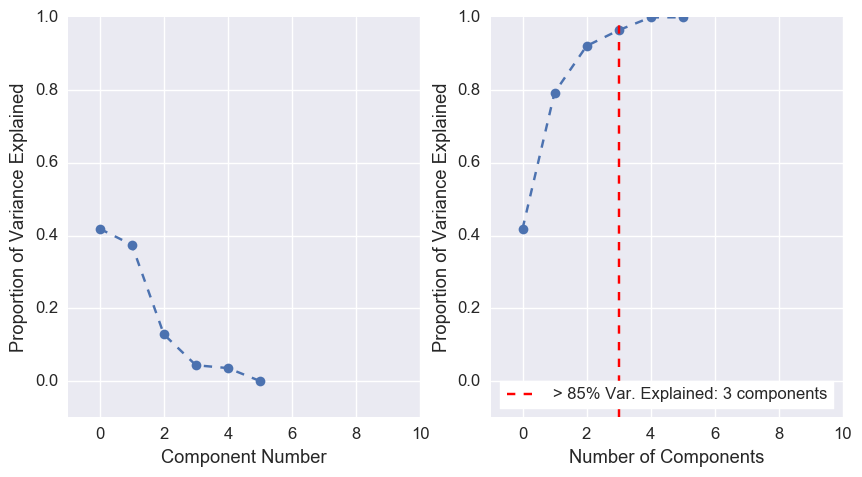

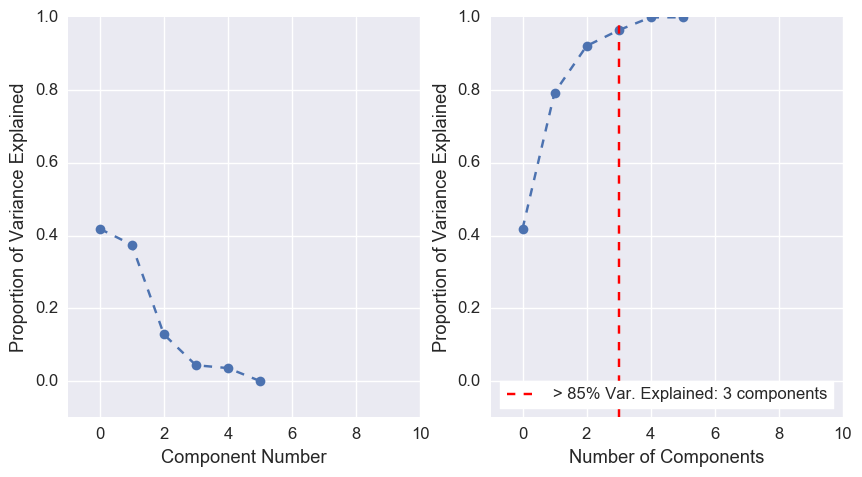

In [74]:
plots.plot_scree(pcomp, required_var=0.85)

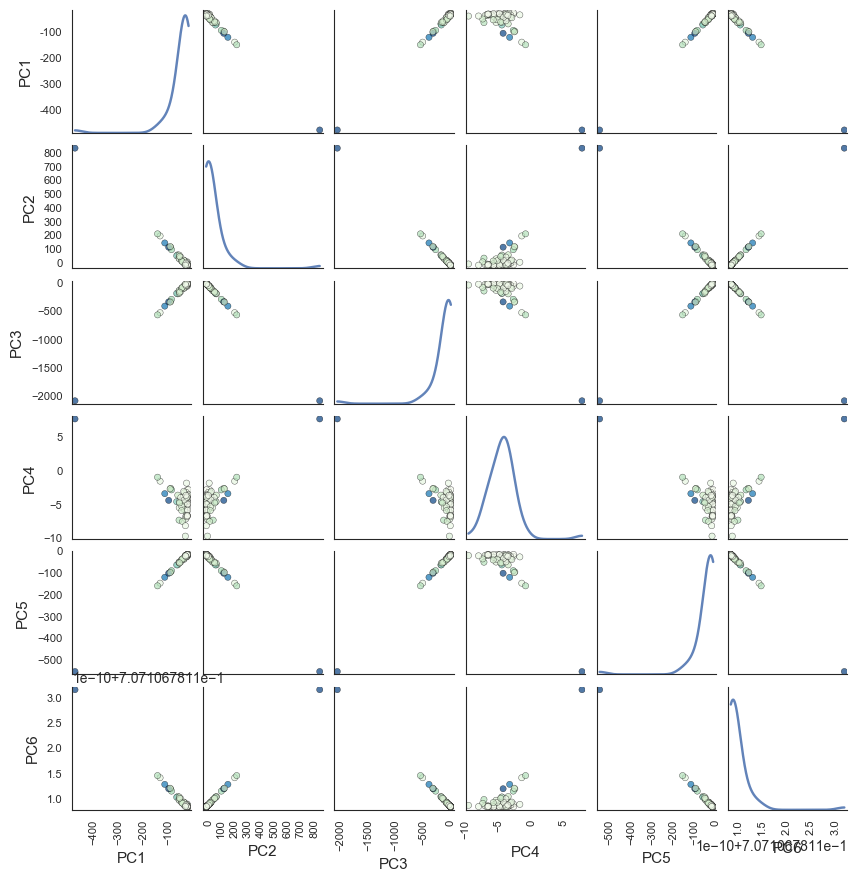

In [83]:
from regressors import regressors
pcr = regressors.PCR(n_components=min(np.shape(X)), regression_type='ols')
pcr.fit(X, y)

# The fitted scaler, pca, and scaler models can be accessed:
scaler, pca, regression = (pcr.scaler, pcr.prcomp, pcr.regression)

# You could then make various plots, such as pca_pairs_plot(), and
# plot_residuals() with these fitted model from PCR.
plots.plot_pca_pairs(pca, X, y, n_components=min(np.shape(X)), cmap="GnBu")
plt.show()

In [76]:
pcr = regressors.PCR(n_components=min(np.shape(X)), regression_type='ols')
pcr.fit(X, y)
pcr.beta_coef_

array([  8.7892e+00,   6.2731e+11,   6.2731e+11,   1.6949e+00,
         1.5700e+00,   1.6338e+00])

In [80]:
X
df[predictors].iloc[:,0:6]

,num_tracts,Rural,Urban,cnty_obesity_pct_adj,cnty_dm_pct_adj,cnty_inactive_pct_adj
0,360.0,0.016667,0.983333,20.4,7.8,16.1
1,1.0,1.000000,0.000000,23.2,7.7,17.3
2,9.0,1.000000,0.000000,22.8,7.5,15.8
3,51.0,0.254902,0.745098,24.3,7.3,16.3
4,10.0,0.800000,0.200000,25.3,6.7,16.1
5,5.0,0.600000,0.400000,22.3,7.4,15.5
6,208.0,0.028846,0.971154,23.4,7.0,16.1
7,7.0,0.428571,0.571429,25.3,8.1,17.7
8,43.0,0.534884,0.465116,19.7,6.8,14.4
9,199.0,0.145729,0.854271,29.2,9.1,20.1


In [77]:
pcr.summary

AttributeError: 'PCR' object has no attribute 'summary'

In [ ]:
def Mean(self):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    mean = 0.0
    for x, p in self.d.items():
        mean += p * x
    return mean

def Cov(xs, ys, meanx=None, meany=None):
    """Computes Cov(X, Y).
    Args:
        xs: sequence of values
        ys: sequence of values
        meanx: optional float mean of xs
        meany: optional float mean of ys
    Returns:
        Cov(X, Y)
    """
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(np.asarray(xs)-meanx, np.asarray(ys)-meany) / len(xs)
    return cov

def Residuals(xs, ys, inter, slope):
    """Computes residuals for a linear fit with parameters inter and slope.
    Args:
        xs: independent variable
        ys: dependent variable
        inter: float intercept
        slope: float slope
    Returns:
        list of residuals
    """
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

def Var(xs, mu=None, ddof=0):
    """Computes variance.
    xs: sequence of values
    mu: option known mean
    ddof: delta degrees of freedom
    returns: float
    """
    xs = np.asarray(xs)

    if mu is None:
        mu = xs.mean()

    ds = xs - mu
    return np.dot(ds, ds) / (len(xs) - ddof)

def CoefDetermination(ys, res):
    """Computes the coefficient of determination (R^2) for given residuals.
    Args:
        ys: dependent variable
        res: residuals
        
    Returns:
        float coefficient of determination
    """
    return 1 - Var(res) / Var(ys)


def MeanVar(xs, ddof=0):
    """Computes mean and variance.
    Based on http://stackoverflow.com/questions/19391149/
    numpy-mean-and-variance-from-single-function
    xs: sequence of values
    ddof: delta degrees of freedom
    
    returns: pair of float, mean and var
    """
    xs = np.asarray(xs)
    xbar = xs.mean()
    s2 = Var(xs, xbar, ddof)
    return xbar, s2

def LeastSquares(xs, ys):
    """Computes a linear least squares fit for ys as a function of xs.
    Args:
        xs: sequence of values
        ys: sequence of values
    Returns:
        tuple of (intercept, slope)
    """
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

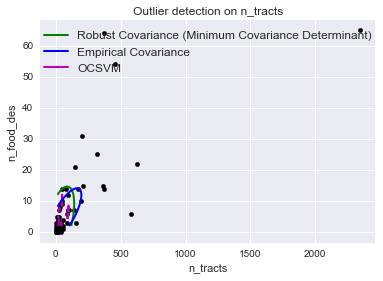

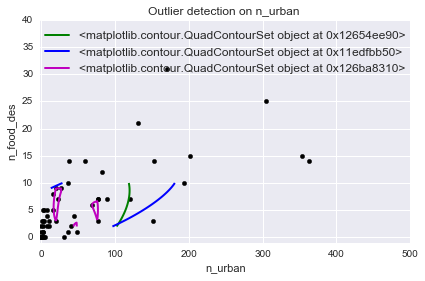

In [94]:
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

# Get data
X1 = df[x1cols].values
X2 = df[x2cols].values

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace((np.min(X1[0]))-2, (np.max(X1[0])+2)), 
                       np.linspace((np.min(X1[-1]))-2, (np.max(X1[-1])+2)))
xx2, yy2 = np.meshgrid(np.linspace((np.min(X2[0]))-2, (np.max(X2[0])+2)), 
                       np.linspace((np.min(X2[-1]))-2, (np.max(X2[-1])+2)))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list( legend1.values() )
legend1_keys_list = list( legend1.keys() )

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on n_tracts")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
# plt.annotate("several confounded points", xy=(24, 19),
#              xycoords="data", textcoords="data",
#              xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
#plt.xlim((xx1.min(), xx1.max()))
#plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("n_food_des")
plt.xlabel("n_tracts")

legend2_values_list = list( legend2.values() )
legend2_keys_list = list( legend2.keys() )

plt.figure(2)  # "banana" shape
plt.title("Outlier detection on n_urban ")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((-1, 500))
plt.ylim((-1, 40))
#plt.xlim((xx2.min(), xx2.max()))
#plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_values_list[0], legend2_values_list[1], legend2_values_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("n_food_des")
plt.xlabel("n_urban")
plt.tight_layout()
plt.show()

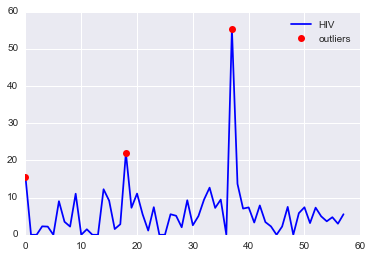

In [133]:
def is_outlier(value, p25, p75):
    """Check if value is an outlier
    """
    lower = p25 - 1.5 * (p75 - p25)
    upper = p75 + 1.5 * (p75 - p25)
    return value <= lower or value >= upper
 

def get_indices_of_outliers(values):
    """Get outlier indices (if any)
    """
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
     
    indices_of_outliers = []
    for ind, value in enumerate(values):
        if is_outlier(value, p25, p75):
            indices_of_outliers.append(ind)
    return indices_of_outliers
 
x1cols = [col for col in cols if col in ['num_tracts', 'n_food_des']]
x2cols=[col for col in cols if col in [ 'n_food_des', 'HIV']]
x2cols.reverse()
x2cols
X1 = df[x1cols]
X2 = df[x2cols]

feat=X2.iloc[:,0]
values=X2.iloc[:,0].values
y=X2.iloc[:,1].values
indices_of_outliers = get_indices_of_outliers(feat)
 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(feat, 'b-', label=x2cols[0])
ax.plot(indices_of_outliers, values[indices_of_outliers],'ro',markersize = 7,label='outliers')
ax.legend(loc='best')

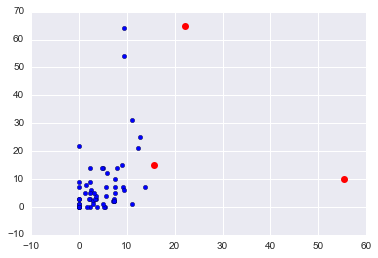

In [135]:
#plt.plot(X1.iloc[:,1], 'b-')#, label=x1cols[0])
plt.scatter(X2.iloc[:,0].values, X2.iloc[:,1].values)
plt.plot( values[indices_of_outliers],y[indices_of_outliers],'ro',markersize = 7,label='outliers')

In [142]:
X2.iloc[indices_of_outliers,:].describe()

#X2.describe()

,HIV,n_food_des
count,3.000000,3.000000
mean,31.045333,30.000000
std,21.363687,30.413813
min,15.657000,10.000000
25%,18.849500,12.500000
50%,22.042000,15.000000
75%,38.739500,40.000000
max,55.437000,65.000000


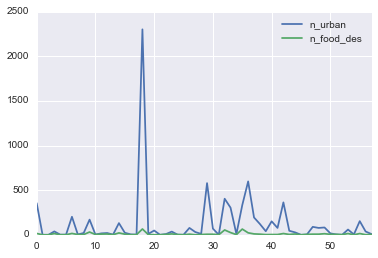

In [116]:
X2.plot()

In [59]:
X1
from sklearn.datasets import load_boston
boston = load_boston()

dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
x1=dataset.columns.tolist()
x1=[x1[i] for i in range(len(x1)) if i in [8, 10]]
x2=dataset.columns.tolist()
x2=[x2[i] for i in range(len(x2)) if i in [5, 12]]
#sns.pairplot(dataset[x2])
dataset[x2].describe()

,RM,LSTAT
count,506.000000,506.000000
mean,6.284634,12.653063
std,0.702617,7.141062
min,3.561000,1.730000
25%,5.885500,6.950000
50%,6.208500,11.360000
75%,6.623500,16.955000
max,8.780000,37.970000


In [18]:
cols[5:10]

['rural_des', 'Rural', 'Urban', 'LILATracts_1And10', 'high_food_des_prev']

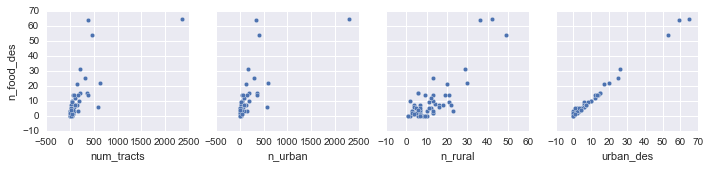

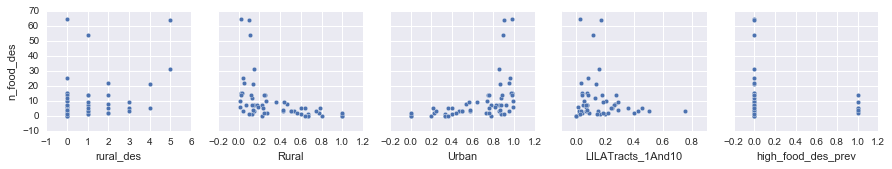

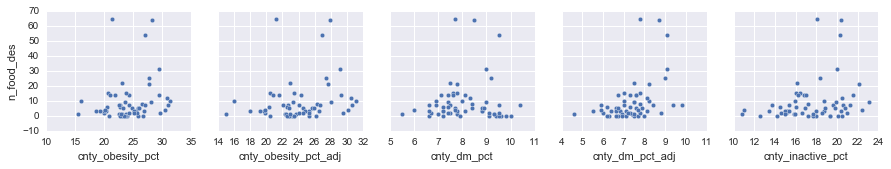

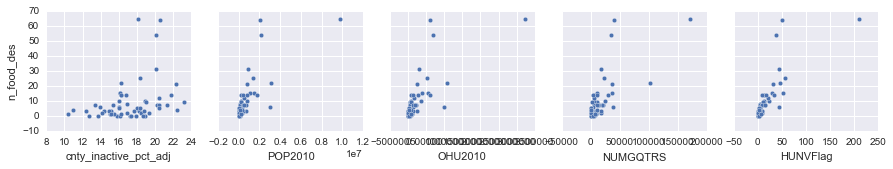

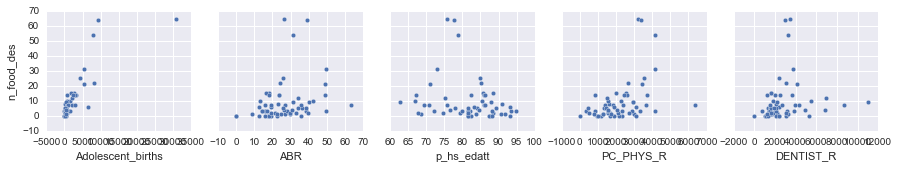

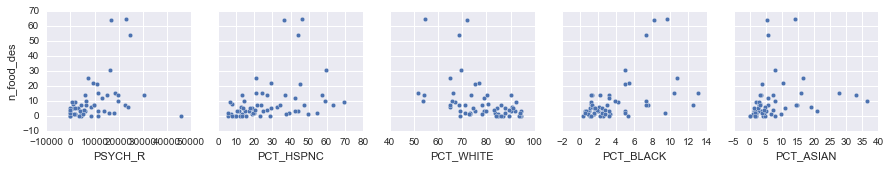

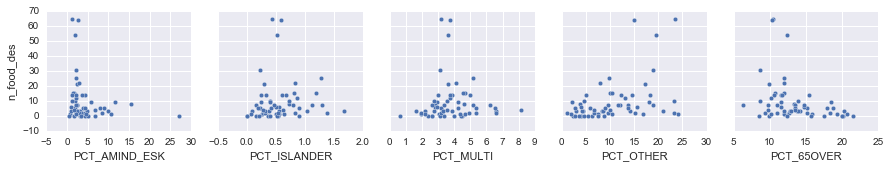

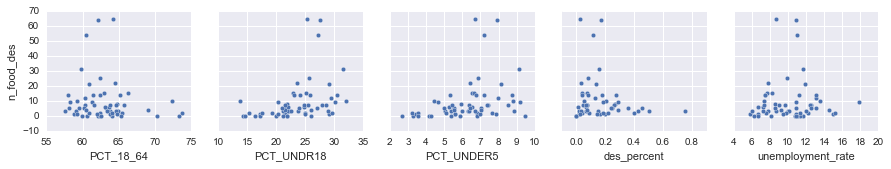

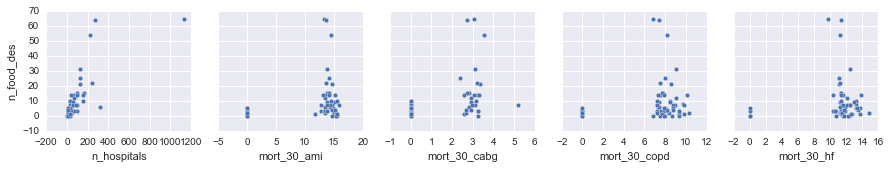

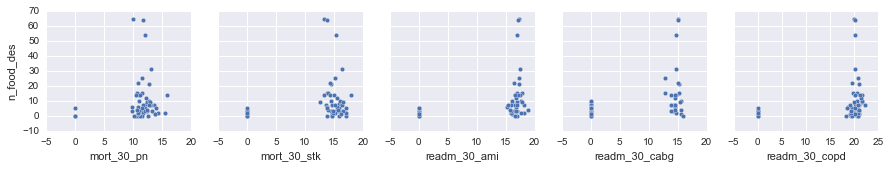

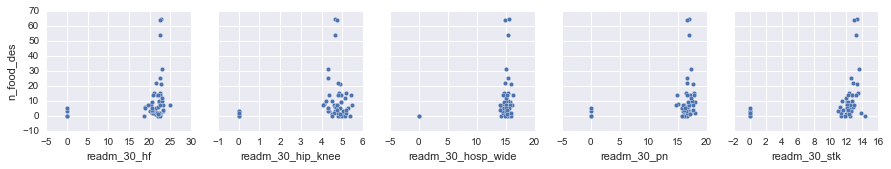

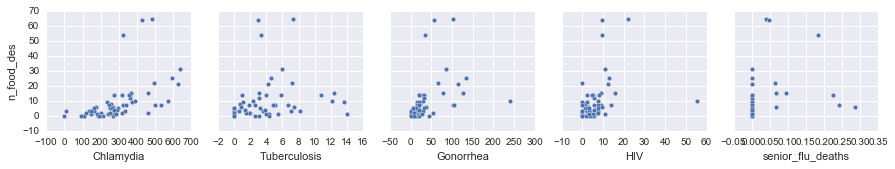

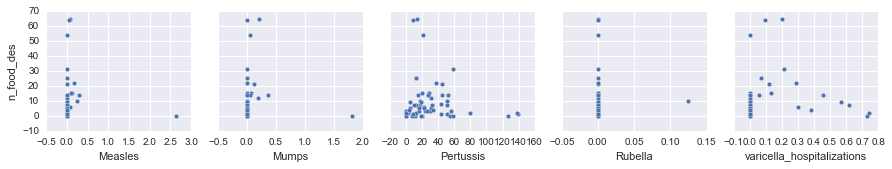

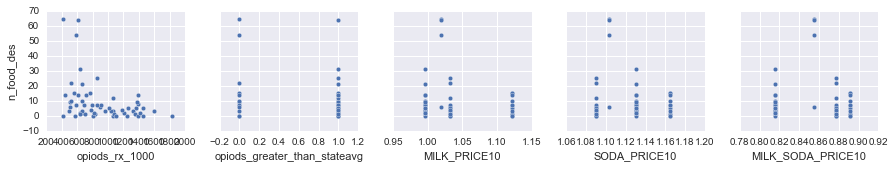

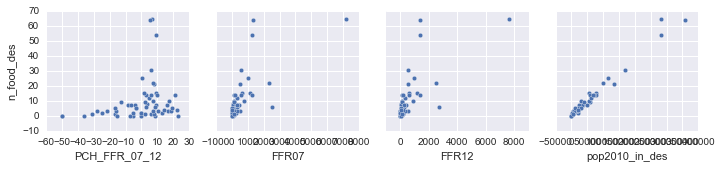

In [21]:
sns.pairplot(df,y_vars=['n_food_des'],x_vars=['num_tracts', 'n_urban', 'n_rural', 'urban_des'])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[5:10])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[10:15])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[15:20])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[20:25])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[25:30])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[30:35])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[35:40])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[40:45])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[45:50])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[50:55])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[55:60])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[60:65])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[65:70])
sns.pairplot(df,y_vars=['n_food_des'],x_vars=cols[70:])


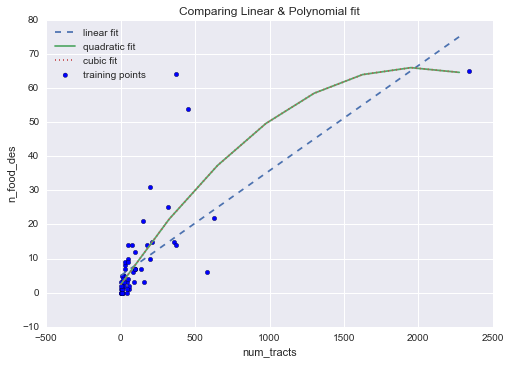

Training MSE linear: 91.538, quadratic: 75.283, cubic: 65.311
Training R^2 linear: 0.522, quadratic: 0.607, cubic: 0.659
Cubic


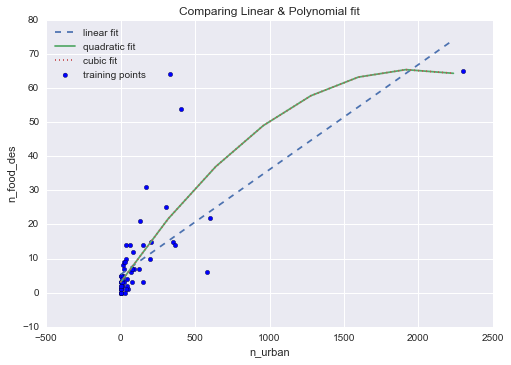

Training MSE linear: 95.112, quadratic: 80.468, cubic: 66.224
Training R^2 linear: 0.504, quadratic: 0.580, cubic: 0.654
Cubic


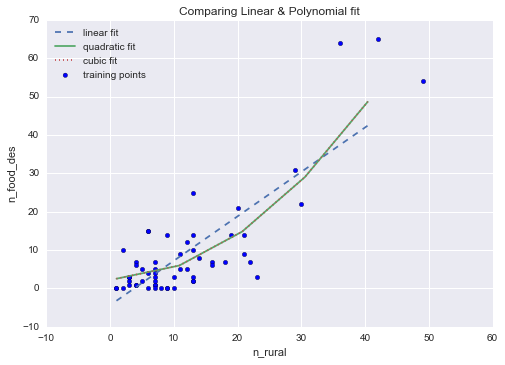

Training MSE linear: 61.387, quadratic: 45.419, cubic: 42.196
Training R^2 linear: 0.680, quadratic: 0.763, cubic: 0.780
Cubic


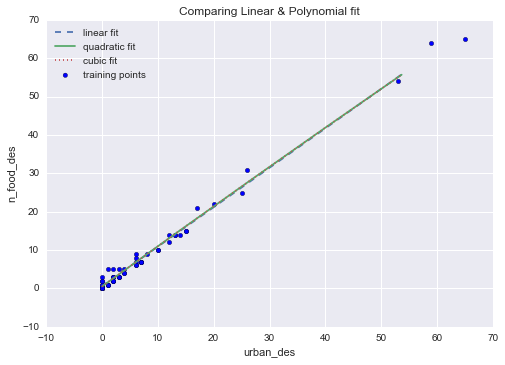

Training MSE linear: 1.604, quadratic: 1.590, cubic: 1.485
Training R^2 linear: 0.992, quadratic: 0.992, cubic: 0.992
Cubic


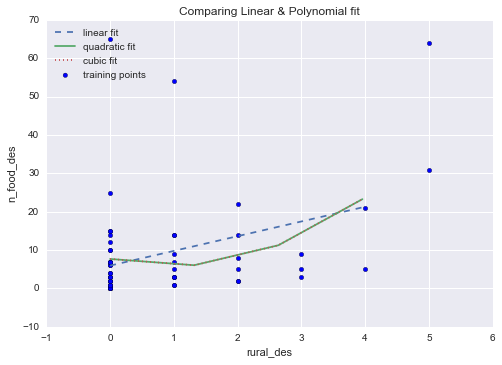

Training MSE linear: 166.073, quadratic: 151.668, cubic: 136.898
Training R^2 linear: 0.134, quadratic: 0.209, cubic: 0.286
Cubic


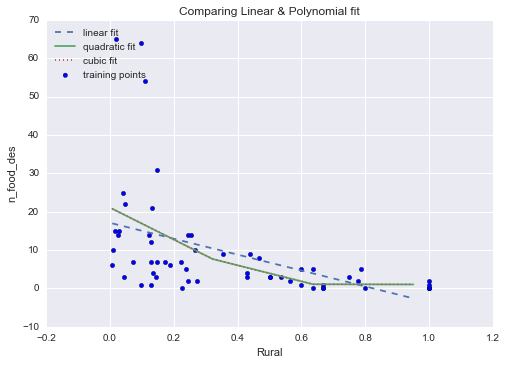

Training MSE linear: 149.213, quadratic: 141.249, cubic: 140.113
Training R^2 linear: 0.222, quadratic: 0.263, cubic: 0.269
Cubic


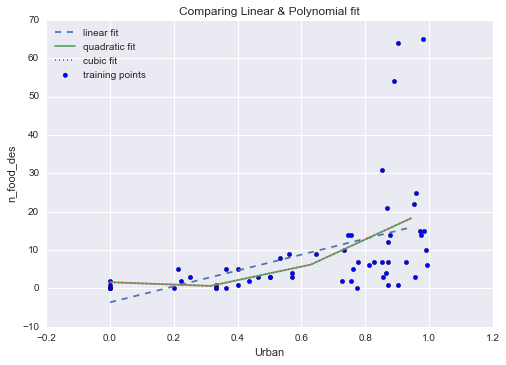

Training MSE linear: 149.213, quadratic: 141.249, cubic: 140.113
Training R^2 linear: 0.222, quadratic: 0.263, cubic: 0.269
Cubic


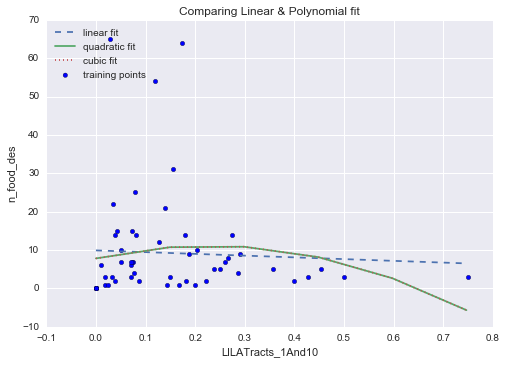

Training MSE linear: 191.214, quadratic: 186.101, cubic: 172.864
Training R^2 linear: 0.002, quadratic: 0.029, cubic: 0.098
Cubic


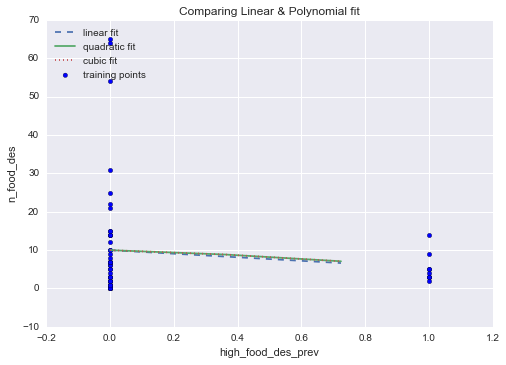

Training MSE linear: 188.844, quadratic: 188.844, cubic: 188.844
Training R^2 linear: 0.015, quadratic: 0.015, cubic: 0.015
Linear
Cubic
LINEAR FITS BETTER


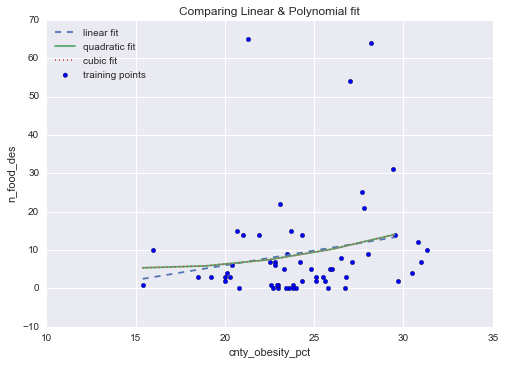

Training MSE linear: 184.353, quadratic: 183.773, cubic: 183.025
Training R^2 linear: 0.038, quadratic: 0.041, cubic: 0.045
Cubic


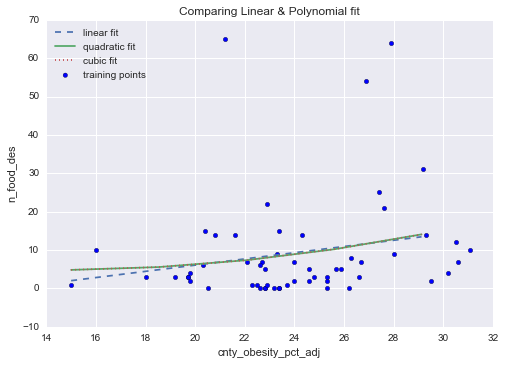

Training MSE linear: 183.504, quadratic: 182.994, cubic: 182.167
Training R^2 linear: 0.043, quadratic: 0.045, cubic: 0.050
Cubic


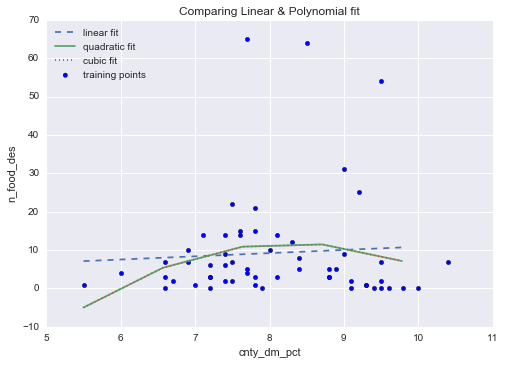

Training MSE linear: 190.879, quadratic: 182.842, cubic: 182.136
Training R^2 linear: 0.004, quadratic: 0.046, cubic: 0.050
Cubic


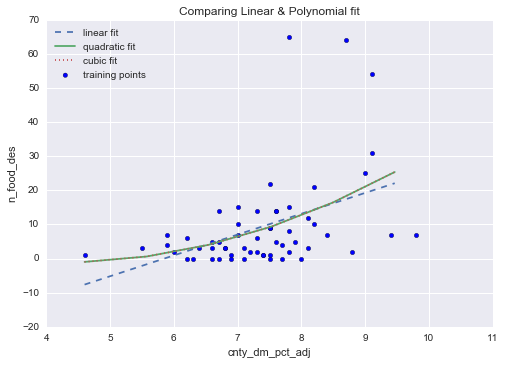

Training MSE linear: 156.341, quadratic: 154.254, cubic: 150.103
Training R^2 linear: 0.184, quadratic: 0.195, cubic: 0.217
Cubic


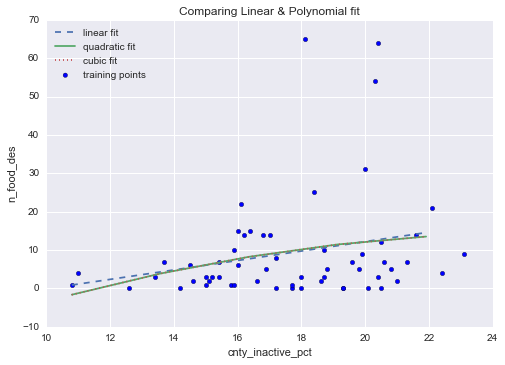

Training MSE linear: 179.993, quadratic: 179.493, cubic: 177.454
Training R^2 linear: 0.061, quadratic: 0.064, cubic: 0.074
Cubic


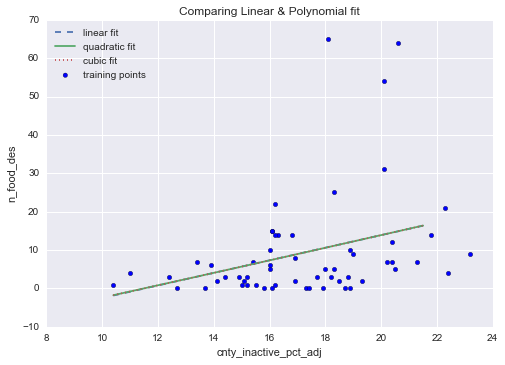

Training MSE linear: 170.932, quadratic: 170.931, cubic: 166.909
Training R^2 linear: 0.108, quadratic: 0.108, cubic: 0.129
Cubic


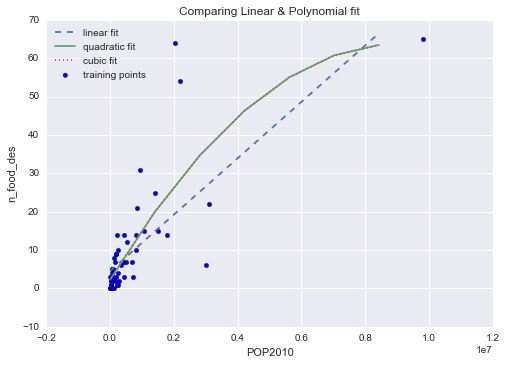

Training MSE linear: 85.113, quadratic: 72.200, cubic: 62.154
Training R^2 linear: 0.556, quadratic: 0.623, cubic: 0.676
Cubic


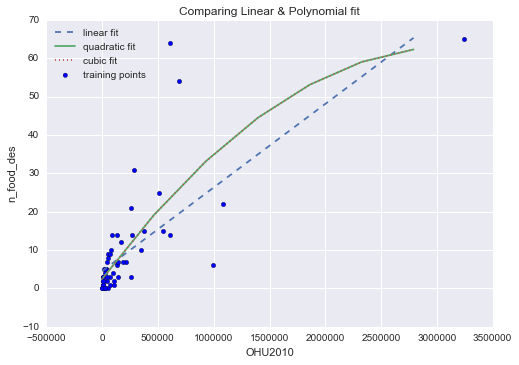

Training MSE linear: 89.061, quadratic: 78.617, cubic: 65.925
Training R^2 linear: 0.535, quadratic: 0.590, cubic: 0.656
Cubic


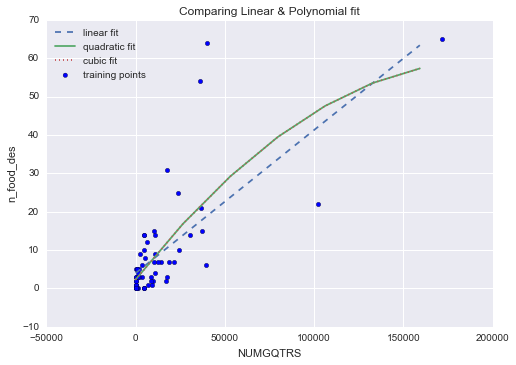

Training MSE linear: 93.643, quadratic: 88.442, cubic: 79.904
Training R^2 linear: 0.511, quadratic: 0.539, cubic: 0.583
Cubic


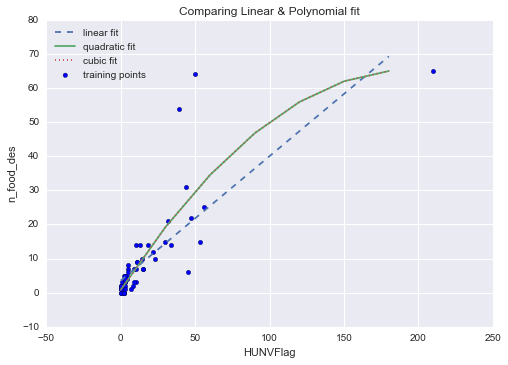

Training MSE linear: 71.626, quadratic: 56.118, cubic: 56.107
Training R^2 linear: 0.626, quadratic: 0.707, cubic: 0.707
Cubic


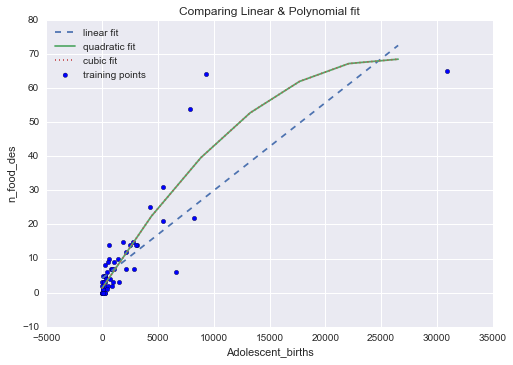

Training MSE linear: 61.990, quadratic: 38.815, cubic: 35.862
Training R^2 linear: 0.677, quadratic: 0.797, cubic: 0.813
Cubic


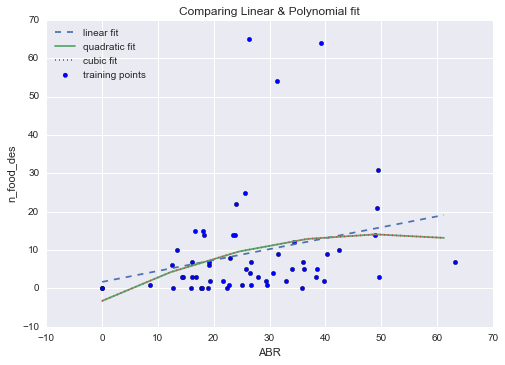

Training MSE linear: 179.522, quadratic: 177.123, cubic: 176.235
Training R^2 linear: 0.063, quadratic: 0.076, cubic: 0.081
Cubic


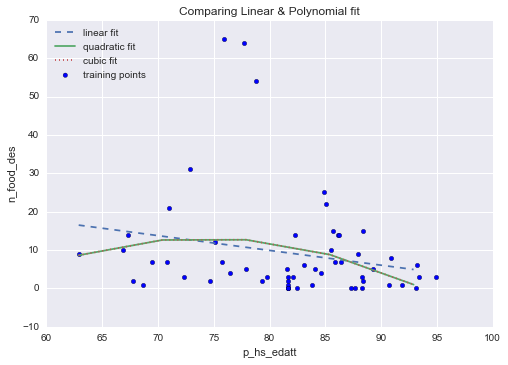

Training MSE linear: 183.308, quadratic: 178.122, cubic: 174.570
Training R^2 linear: 0.044, quadratic: 0.071, cubic: 0.089
Cubic


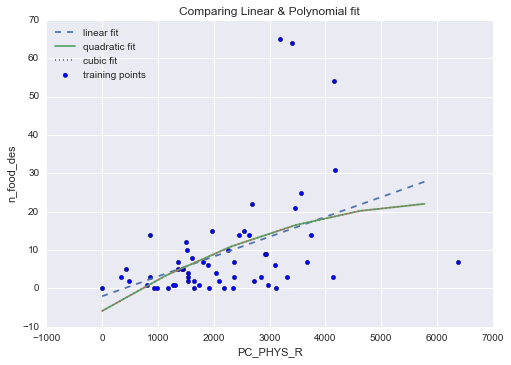

Training MSE linear: 156.031, quadratic: 153.622, cubic: 137.088
Training R^2 linear: 0.186, quadratic: 0.199, cubic: 0.285
Cubic


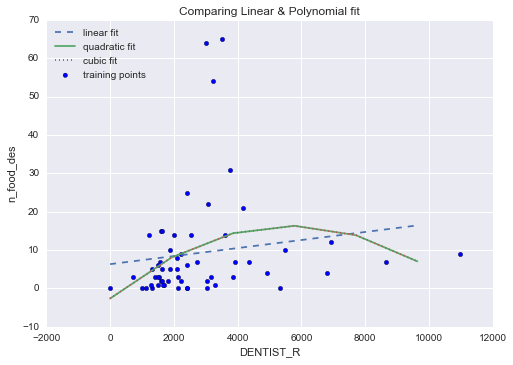

Training MSE linear: 187.595, quadratic: 173.972, cubic: 167.239
Training R^2 linear: 0.021, quadratic: 0.092, cubic: 0.127
Cubic


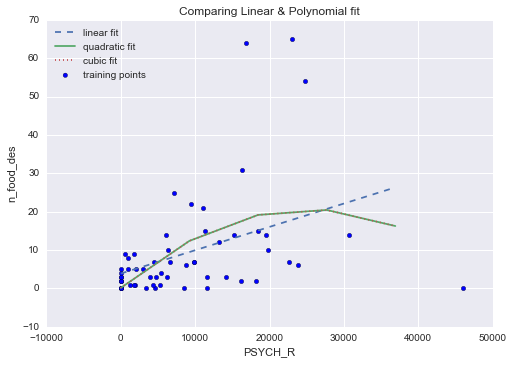

Training MSE linear: 160.126, quadratic: 140.508, cubic: 132.428
Training R^2 linear: 0.165, quadratic: 0.267, cubic: 0.309
Cubic


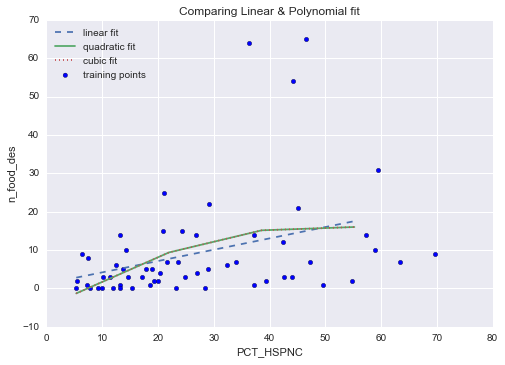

Training MSE linear: 167.577, quadratic: 161.417, cubic: 157.019
Training R^2 linear: 0.126, quadratic: 0.158, cubic: 0.181
Cubic


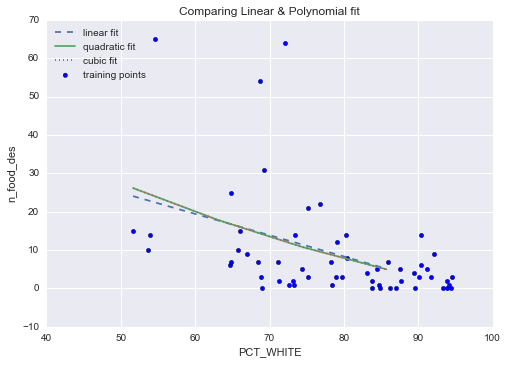

Training MSE linear: 151.959, quadratic: 151.500, cubic: 150.579
Training R^2 linear: 0.207, quadratic: 0.210, cubic: 0.214
Cubic


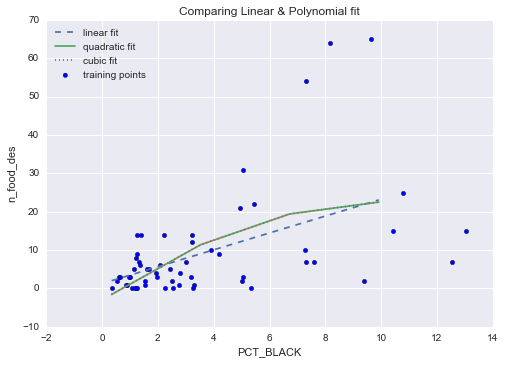

Training MSE linear: 142.399, quadratic: 135.677, cubic: 120.522
Training R^2 linear: 0.257, quadratic: 0.292, cubic: 0.371
Cubic


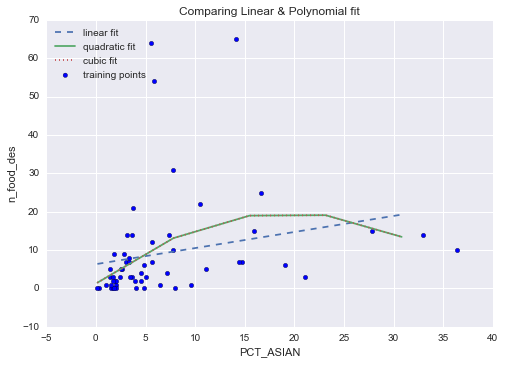

Training MSE linear: 181.353, quadratic: 165.848, cubic: 160.374
Training R^2 linear: 0.054, quadratic: 0.135, cubic: 0.163
Cubic


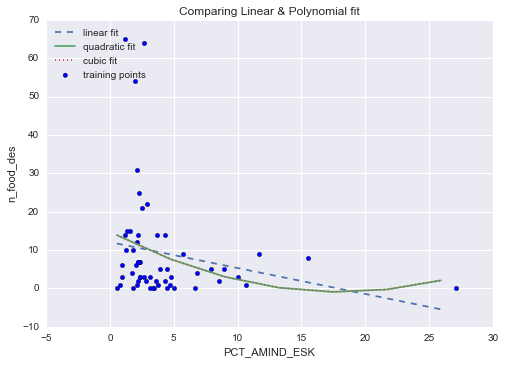

Training MSE linear: 183.507, quadratic: 179.986, cubic: 176.863
Training R^2 linear: 0.043, quadratic: 0.061, cubic: 0.077
Cubic


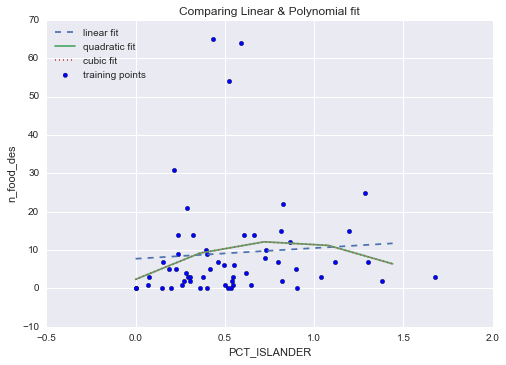

Training MSE linear: 190.671, quadratic: 184.149, cubic: 183.022
Training R^2 linear: 0.005, quadratic: 0.039, cubic: 0.045
Cubic


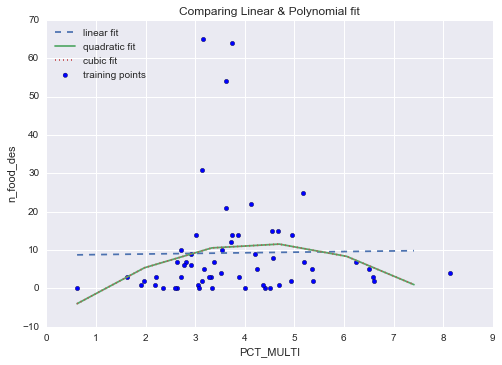

Training MSE linear: 191.628, quadratic: 181.022, cubic: 179.474
Training R^2 linear: 0.000, quadratic: 0.056, cubic: 0.064
Cubic


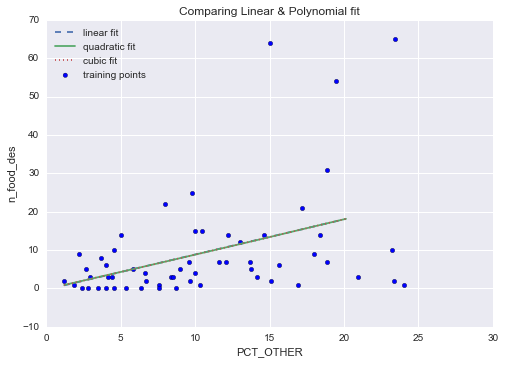

Training MSE linear: 158.329, quadratic: 158.327, cubic: 156.411
Training R^2 linear: 0.174, quadratic: 0.174, cubic: 0.184
Cubic


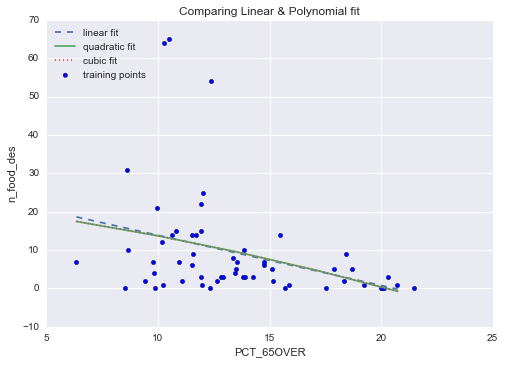

Training MSE linear: 169.494, quadratic: 169.399, cubic: 164.801
Training R^2 linear: 0.116, quadratic: 0.116, cubic: 0.140
Cubic


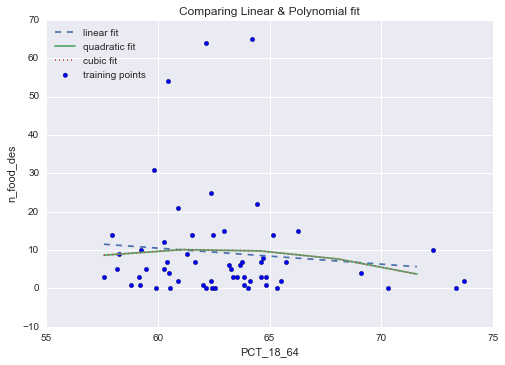

Training MSE linear: 189.529, quadratic: 187.683, cubic: 185.728
Training R^2 linear: 0.011, quadratic: 0.021, cubic: 0.031
Cubic


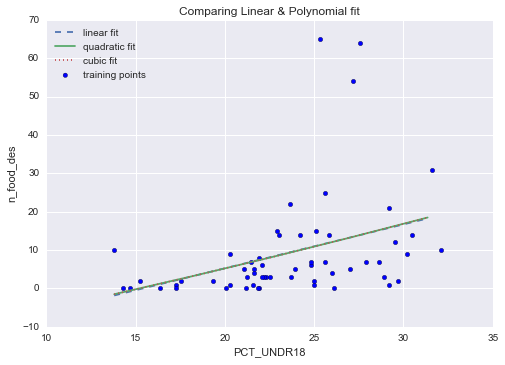

Training MSE linear: 166.475, quadratic: 166.461, cubic: 157.673
Training R^2 linear: 0.131, quadratic: 0.132, cubic: 0.177
Cubic


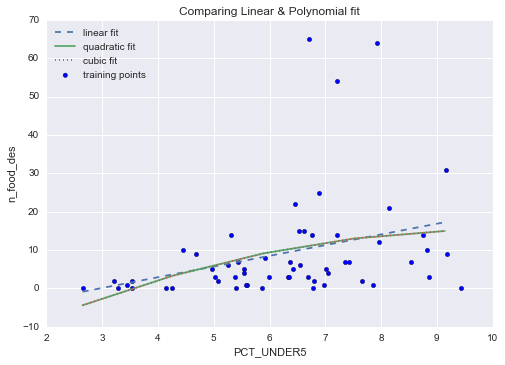

Training MSE linear: 171.163, quadratic: 169.756, cubic: 163.334
Training R^2 linear: 0.107, quadratic: 0.114, cubic: 0.148
Cubic


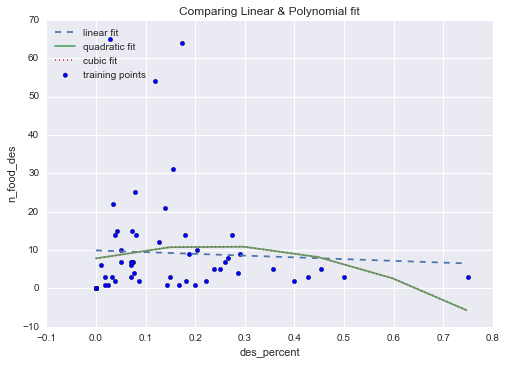

Training MSE linear: 191.214, quadratic: 186.101, cubic: 172.864
Training R^2 linear: 0.002, quadratic: 0.029, cubic: 0.098
Cubic


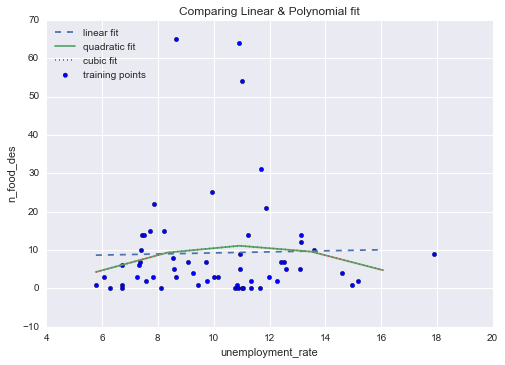

Training MSE linear: 191.550, quadratic: 186.764, cubic: 182.180
Training R^2 linear: 0.001, quadratic: 0.026, cubic: 0.050
Cubic


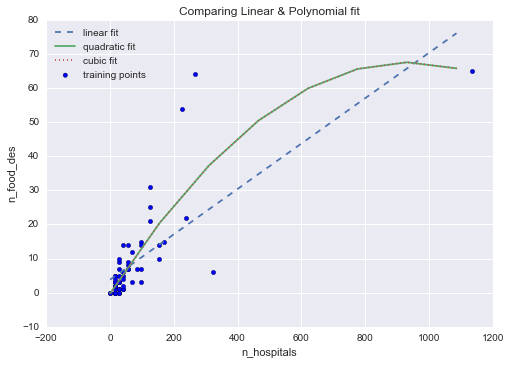

Training MSE linear: 85.109, quadratic: 65.140, cubic: 63.859
Training R^2 linear: 0.556, quadratic: 0.660, cubic: 0.667
Cubic


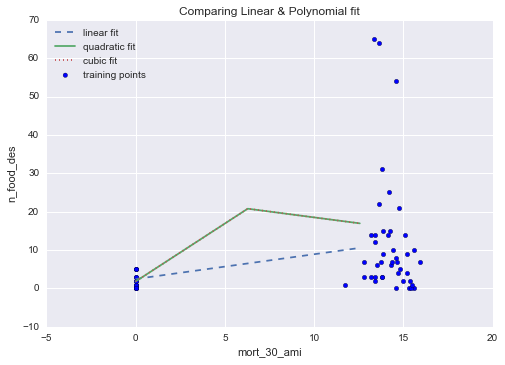

Training MSE linear: 175.270, quadratic: 165.596, cubic: 154.550
Training R^2 linear: 0.086, quadratic: 0.136, cubic: 0.194
Cubic


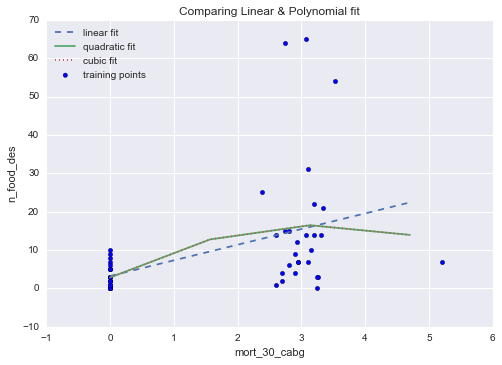

Training MSE linear: 150.810, quadratic: 147.267, cubic: 145.272
Training R^2 linear: 0.213, quadratic: 0.232, cubic: 0.242
Cubic


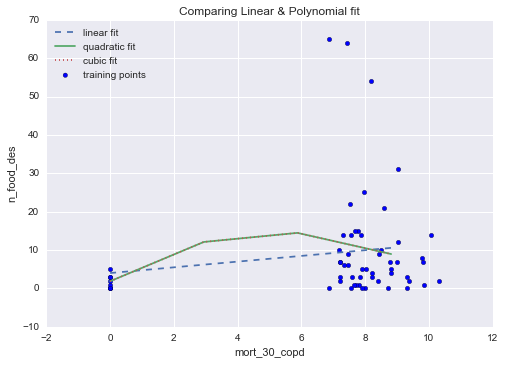

Training MSE linear: 186.882, quadratic: 177.218, cubic: 175.619
Training R^2 linear: 0.025, quadratic: 0.075, cubic: 0.084
Cubic


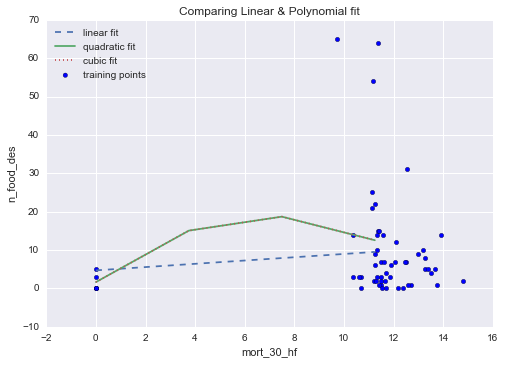

Training MSE linear: 189.108, quadratic: 172.576, cubic: 161.891
Training R^2 linear: 0.013, quadratic: 0.100, cubic: 0.155
Cubic


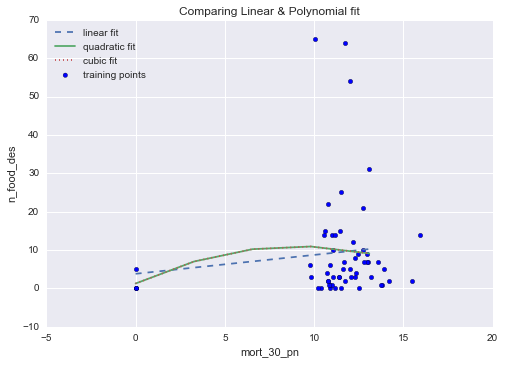

Training MSE linear: 189.083, quadratic: 185.857, cubic: 185.838
Training R^2 linear: 0.014, quadratic: 0.030, cubic: 0.030
Cubic


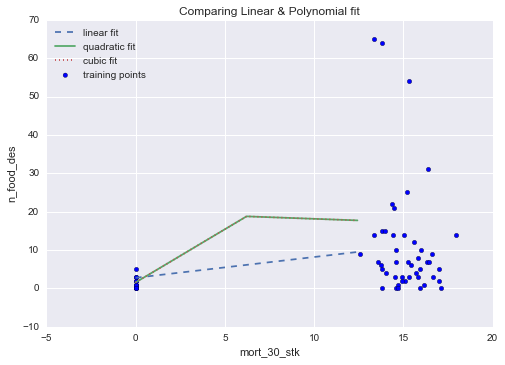

Training MSE linear: 180.365, quadratic: 166.618, cubic: 162.762
Training R^2 linear: 0.059, quadratic: 0.131, cubic: 0.151
Cubic


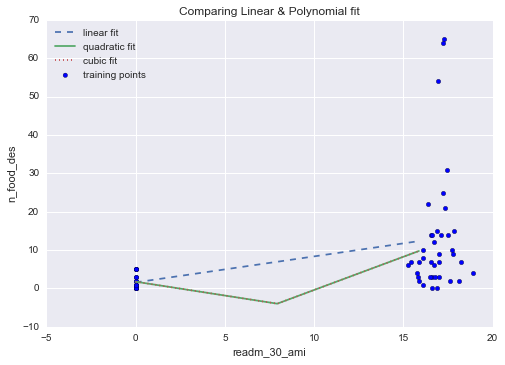

Training MSE linear: 162.692, quadratic: 159.900, cubic: 145.344
Training R^2 linear: 0.151, quadratic: 0.166, cubic: 0.242
Cubic


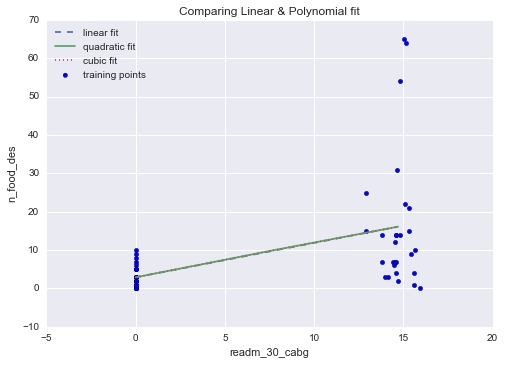

Training MSE linear: 148.108, quadratic: 148.108, cubic: 146.876
Training R^2 linear: 0.227, quadratic: 0.227, cubic: 0.234
Cubic


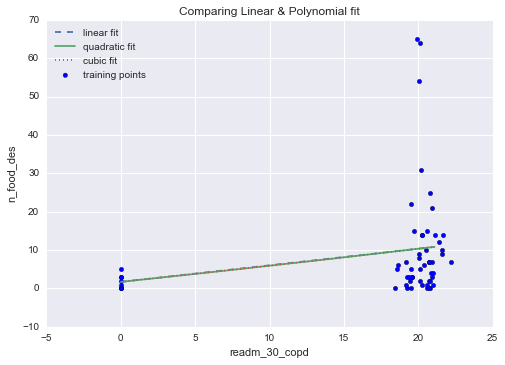

Training MSE linear: 182.437, quadratic: 182.437, cubic: 175.462
Training R^2 linear: 0.048, quadratic: 0.048, cubic: 0.085
Cubic


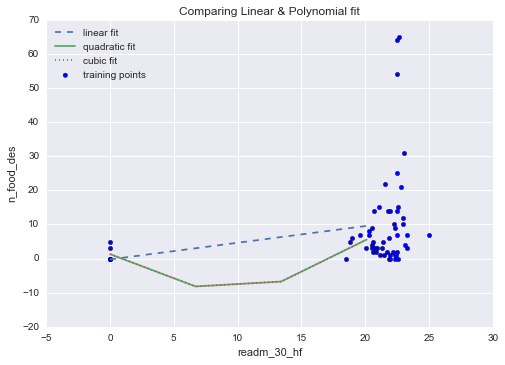

Training MSE linear: 180.926, quadratic: 172.032, cubic: 171.016
Training R^2 linear: 0.056, quadratic: 0.102, cubic: 0.108
Cubic


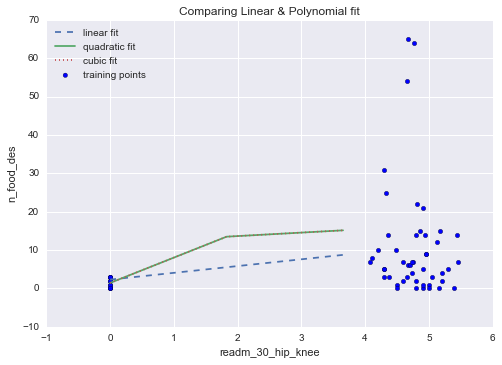

Training MSE linear: 181.288, quadratic: 176.020, cubic: 173.147
Training R^2 linear: 0.054, quadratic: 0.082, cubic: 0.097
Cubic


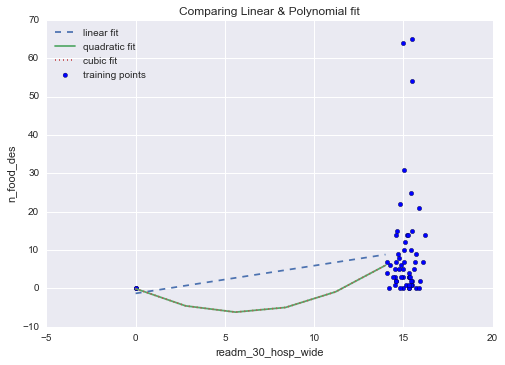

Training MSE linear: 187.572, quadratic: 185.810, cubic: 183.400
Training R^2 linear: 0.021, quadratic: 0.031, cubic: 0.043
Cubic


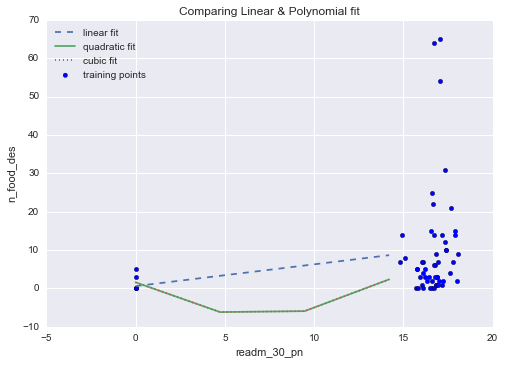

Training MSE linear: 184.461, quadratic: 180.313, cubic: 180.138
Training R^2 linear: 0.038, quadratic: 0.059, cubic: 0.060
Cubic


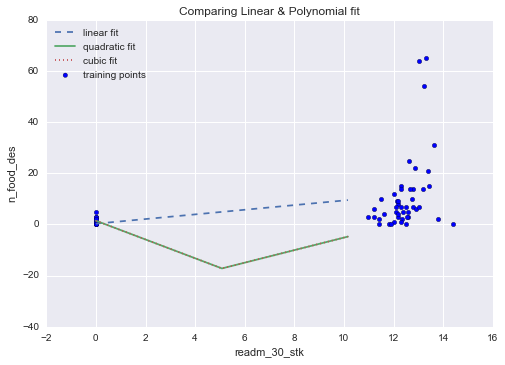

Training MSE linear: 170.419, quadratic: 147.579, cubic: 142.934
Training R^2 linear: 0.111, quadratic: 0.230, cubic: 0.254
Cubic


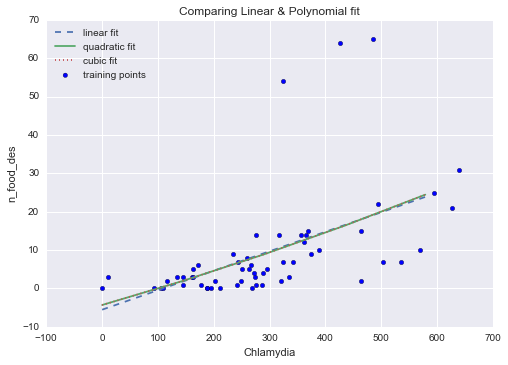

Training MSE linear: 137.663, quadratic: 137.512, cubic: 131.885
Training R^2 linear: 0.282, quadratic: 0.283, cubic: 0.312
Cubic


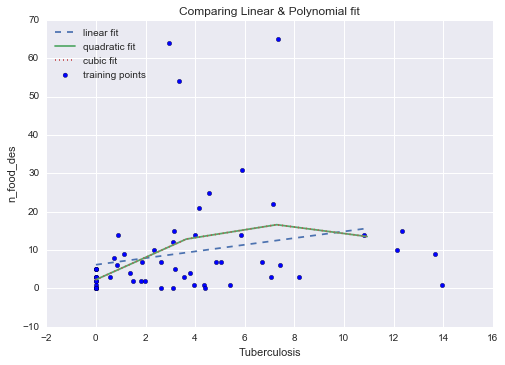

Training MSE linear: 181.679, quadratic: 164.458, cubic: 164.452
Training R^2 linear: 0.052, quadratic: 0.142, cubic: 0.142
Cubic


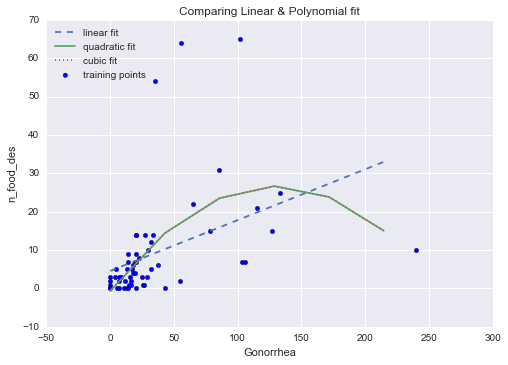

Training MSE linear: 159.326, quadratic: 130.690, cubic: 129.259
Training R^2 linear: 0.169, quadratic: 0.318, cubic: 0.326
Cubic


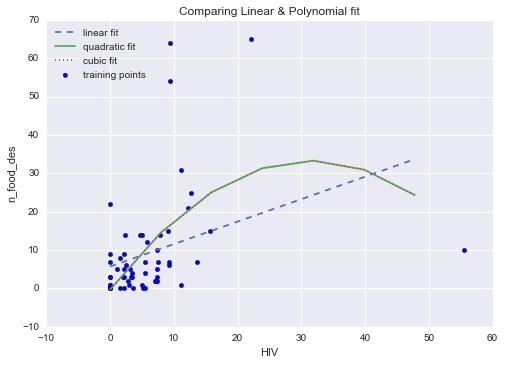

Training MSE linear: 169.923, quadratic: 136.994, cubic: 114.723
Training R^2 linear: 0.113, quadratic: 0.285, cubic: 0.401
Cubic


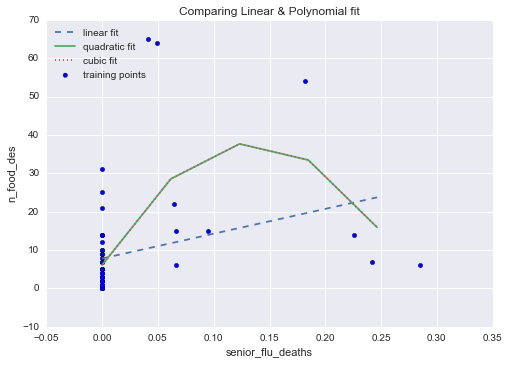

Training MSE linear: 175.805, quadratic: 126.195, cubic: 124.366
Training R^2 linear: 0.083, quadratic: 0.342, cubic: 0.351
Cubic


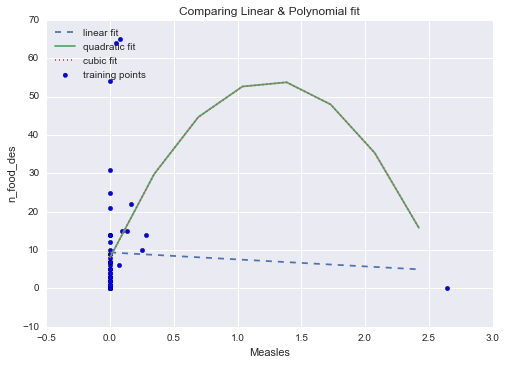

Training MSE linear: 191.280, quadratic: 176.177, cubic: 147.104
Training R^2 linear: 0.002, quadratic: 0.081, cubic: 0.233
Cubic


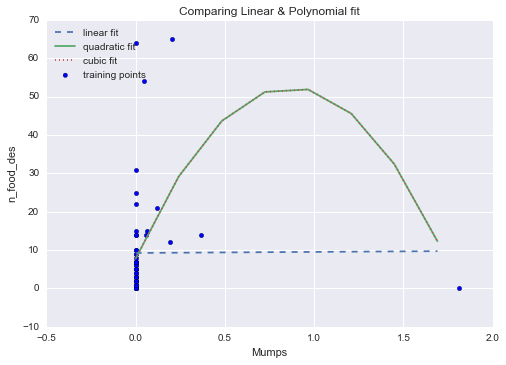

Training MSE linear: 191.670, quadratic: 162.301, cubic: 142.793
Training R^2 linear: 0.000, quadratic: 0.153, cubic: 0.255
Cubic


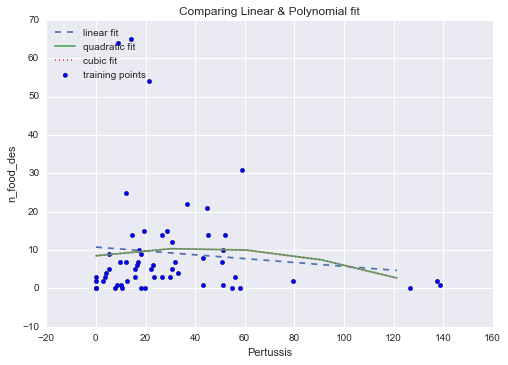

Training MSE linear: 189.359, quadratic: 186.557, cubic: 182.056
Training R^2 linear: 0.012, quadratic: 0.027, cubic: 0.050
Cubic


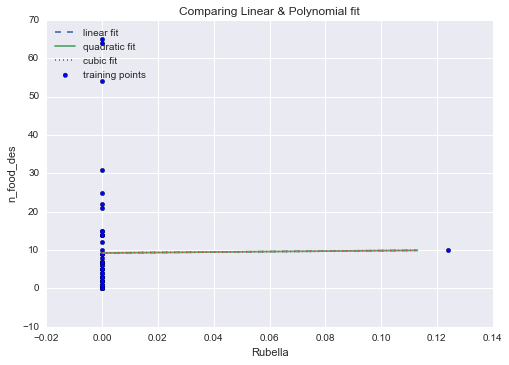

Training MSE linear: 191.665, quadratic: 191.665, cubic: 191.665
Training R^2 linear: 0.000, quadratic: 0.000, cubic: 0.000
Linear
Quadratic
Cubic
LINEAR FITS BETTER


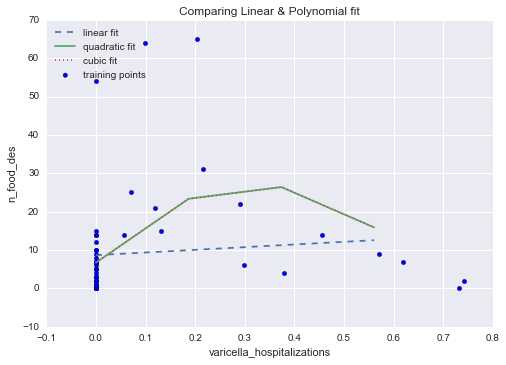

Training MSE linear: 189.981, quadratic: 145.497, cubic: 118.444
Training R^2 linear: 0.009, quadratic: 0.241, cubic: 0.382
Cubic


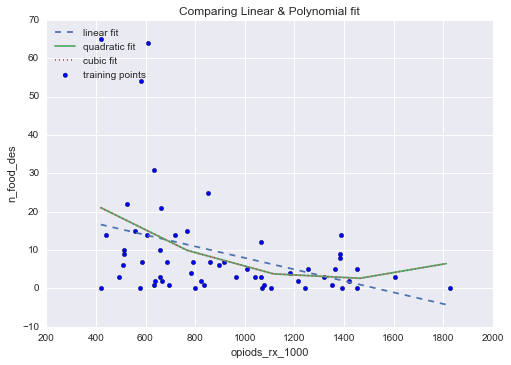

Training MSE linear: 164.447, quadratic: 158.390, cubic: 156.722
Training R^2 linear: 0.142, quadratic: 0.174, cubic: 0.182
Cubic


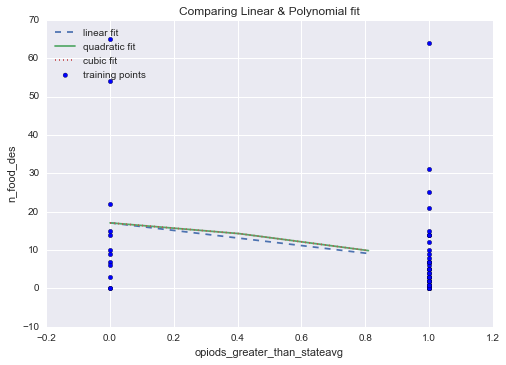

Training MSE linear: 175.702, quadratic: 175.702, cubic: 175.702
Training R^2 linear: 0.083, quadratic: 0.083, cubic: 0.083
Linear
Quadratic
Cubic
LINEAR FITS BETTER


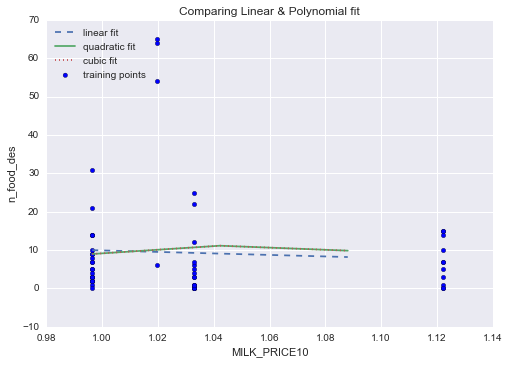

Training MSE linear: 190.868, quadratic: 189.308, cubic: 83.781
Training R^2 linear: 0.004, quadratic: 0.012, cubic: 0.563
Cubic


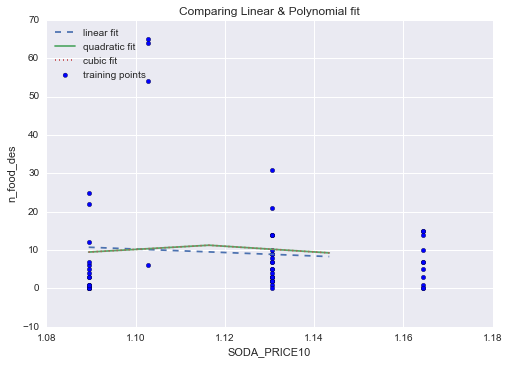

Training MSE linear: 190.197, quadratic: 187.273, cubic: 83.781
Training R^2 linear: 0.008, quadratic: 0.023, cubic: 0.563
Cubic


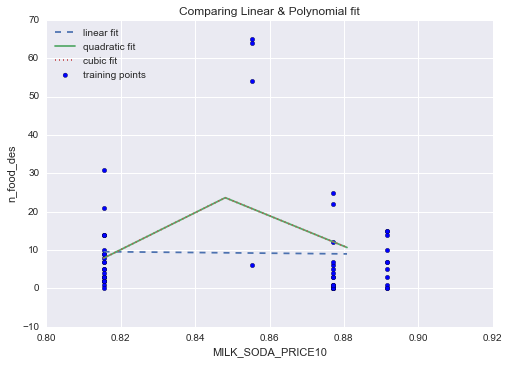

Training MSE linear: 191.591, quadratic: 155.660, cubic: 83.781
Training R^2 linear: 0.000, quadratic: 0.188, cubic: 0.563
Cubic


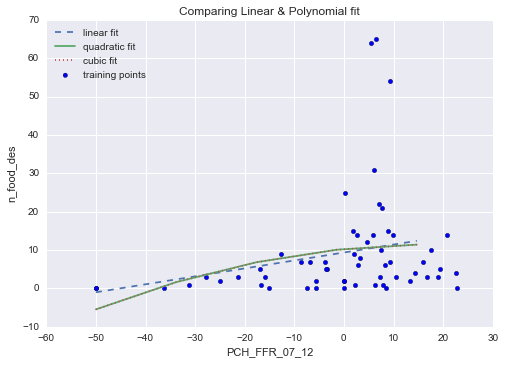

Training MSE linear: 180.450, quadratic: 178.672, cubic: 167.023
Training R^2 linear: 0.059, quadratic: 0.068, cubic: 0.129
Cubic


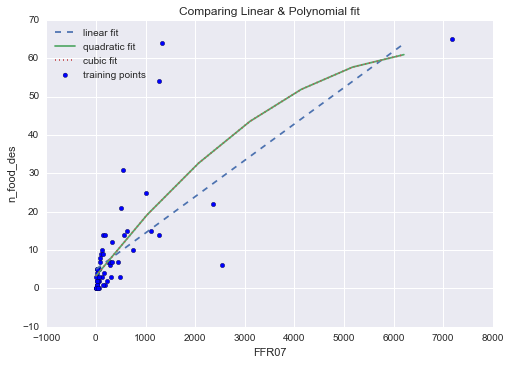

Training MSE linear: 95.752, quadratic: 86.958, cubic: 62.851
Training R^2 linear: 0.500, quadratic: 0.546, cubic: 0.672
Cubic


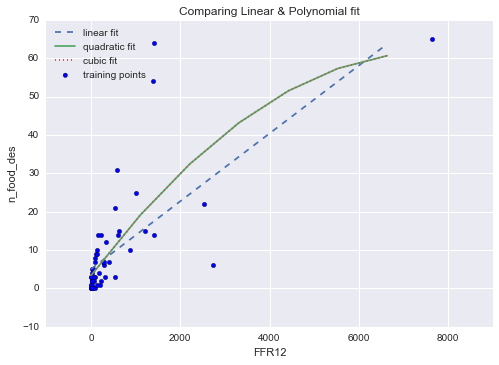

Training MSE linear: 96.088, quadratic: 87.706, cubic: 62.336
Training R^2 linear: 0.499, quadratic: 0.542, cubic: 0.675
Cubic


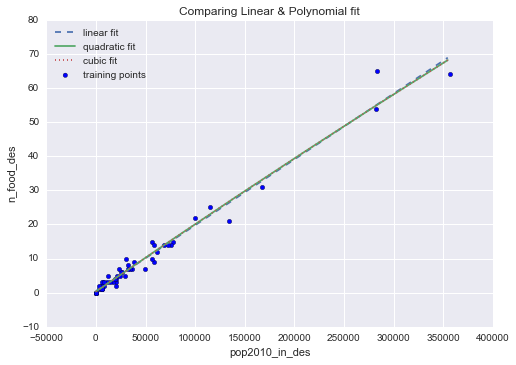

Training MSE linear: 4.381, quadratic: 4.349, cubic: 3.934
Training R^2 linear: 0.977, quadratic: 0.977, cubic: 0.979
Cubic


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def lin_poly_compare(X,y,xname):
    x_copy = X.copy()
    lr = LinearRegression()
    pr = LinearRegression()
    cr = LinearRegression()
    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad = quadratic.fit_transform(X)
    X_cubic = cubic.fit_transform(x_copy)
    lr.fit(X, y)
    X_fit = np.arange(np.min(X),np.max(X),np.std(X))[:, np.newaxis]
    y_lin_fit = lr.predict(X_fit)
    pr.fit(X_quad, y)
    y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
    cr.fit(X_cubic, y)
    y_cubic_fit = cr.predict(cubic.fit_transform(X_fit))
    plt.scatter(X, y, label='training points')
    plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
    plt.plot(X_fit, y_quad_fit, label='quadratic fit')
    plt.plot(X_fit, y_quad_fit, label='cubic fit',linestyle=':')
    plt.legend(loc='upper left')
    plt.xlabel(xname)
    plt.ylabel("n_food_des")
    plt.title('Comparing Linear & Polynomial fit')
    plt.show()
    y_lin_pred = lr.predict(X)
    y_quad_pred = pr.predict(X_quad)
    y_cubic_pred = cr.predict(X_cubic)
    lin_mse, quad_mse, cubic_mse = mean_squared_error(y, y_lin_pred),mean_squared_error(y, y_quad_pred),mean_squared_error(y, y_cubic_pred)
    lin_r2, quad_r2, cubic_r2 = r2_score(y, y_lin_pred),r2_score(y, y_quad_pred),r2_score(y, y_cubic_pred)
    print('Training MSE linear: %.3f, quadratic: %.3f, cubic: %.3f' % (mean_squared_error(y, y_lin_pred),mean_squared_error(y, y_quad_pred),mean_squared_error(y, y_cubic_pred)))
    print('Training R^2 linear: %.3f, quadratic: %.3f, cubic: %.3f' % ( r2_score(y, y_lin_pred),r2_score(y, y_quad_pred),r2_score(y, y_cubic_pred)))
    r2lst = [lin_r2, quad_r2, cubic_r2]
    mselst= [lin_mse, quad_mse, cubic_mse]
    if np.min(mselst) == lin_mse:
        print 'Linear'
    if np.min(mselst) == quad_mse:
        print 'Quadratic'
    if np.min(mselst) == cubic_mse:
        print 'Cubic'
    if np.max(r2lst)==lin_r2:
        print 'LINEAR FITS BETTER'
        return 'linear'
    if np.max(r2lst)==quad_r2:
        return 'quadratic'
    else:
        return 'cubic'

def RemoveOutliers(frame, m=3):
    new_data = pd.DataFrame(frame)
    clean_data = new_data[np.abs(new_data-new_data.mean())<=(m*new_data.std())]
    return clean_data.dropna(axis=0)
        
data = df.copy(deep=False)
lin_feats = {}
lin_feats_wo_outliers = {}
for i in range(len(cols)):
#     if i > 10:
#         break
    if cols[i] != 'n_food_des':
        name = cols[i]
        lin_feats[name] = lin_poly_compare(np.array(df[cols[i]]).reshape(-1,1),np.array(df['n_food_des']).reshape(-1,1),name)



In [38]:
lin_feats
# linear = ['Rubella','high_food_des_prev','opiods_greater_than_stateavg' ] 

{'ABR': 'cubic',
 'Adolescent_births': 'cubic',
 'Chlamydia': 'cubic',
 'DENTIST_R': 'cubic',
 'FFR07': 'cubic',
 'FFR12': 'cubic',
 'Gonorrhea': 'cubic',
 'HIV': 'cubic',
 'HUNVFlag': 'cubic',
 'LILATracts_1And10': 'cubic',
 'MILK_PRICE10': 'cubic',
 'MILK_SODA_PRICE10': 'cubic',
 'Measles': 'cubic',
 'Mumps': 'cubic',
 'NUMGQTRS': 'cubic',
 'OHU2010': 'cubic',
 'PCH_FFR_07_12': 'cubic',
 'PCT_18_64': 'cubic',
 'PCT_65OVER': 'cubic',
 'PCT_AMIND_ESK': 'cubic',
 'PCT_ASIAN': 'cubic',
 'PCT_BLACK': 'cubic',
 'PCT_HSPNC': 'cubic',
 'PCT_ISLANDER': 'cubic',
 'PCT_MULTI': 'cubic',
 'PCT_OTHER': 'cubic',
 'PCT_UNDER5': 'cubic',
 'PCT_UNDR18': 'cubic',
 'PCT_WHITE': 'cubic',
 'PC_PHYS_R': 'cubic',
 'POP2010': 'cubic',
 'PSYCH_R': 'cubic',
 'Pertussis': 'cubic',
 'Rubella': 'linear',
 'Rural': 'cubic',
 'SODA_PRICE10': 'cubic',
 'Tuberculosis': 'cubic',
 'Urban': 'cubic',
 'cnty_dm_pct': 'cubic',
 'cnty_dm_pct_adj': 'cubic',
 'cnty_inactive_pct': 'cubic',
 'cnty_inactive_pct_adj': 'cubic',
 '

In [10]:
observations = len(df)
cols = [col for col in cols if col != 'County']
target = 'n_food_des' 
exclude = ['County','n_food_des','rural_des','urban_des','pop2010_in_des','LILATracts_1And10','des_percent','cnty_obesity_pct','cnty_inactive_pct','cnty_dm_pct', 'high_food_des_prev','at_risk','MILK_SODA_PRICE10','n_rural','n_urban','Adolescent_births','PCH_FFR_07_12']
predictors = [column for column in cols if column not in exclude]
X = df[predictors].values
Y = df[target].values

In [ ]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from minepy import MINE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.random.seed(0)
ranks = {}
 
def rank_to_dict(ranks, predictors, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(predictors, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), predictors)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), predictors)
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), predictors)
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), predictors)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), predictors, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, predictors)
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, predictors)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, predictors) 
 
r = {}
for name in predictors:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in predictors:
    print "%s\t%s" % (name, "\t".join(map(str, [ranks[method][name] for method in methods])))

In [ ]:
feature_df = pd.DataFrame(ranks)
feature_df.describe()

feature_df[feature_df['Corr.']>= 0.15] # shows the predictors with the strongest correlation with the target variable
feature_df[feature_df['Linear reg']>= 0.07]# quatifies the effect of the most influential predictor_vars on target variable 
feature_df[feature_df['Lasso'] >= 0.2] # identifies top features 
feature_df[feature_df['MIC'] >= 0.505] # shows the most mutal dependent predictors based on optimal binning. MIC measures mutual dependence between variables (predictor & target)
feature_df[feature_df['RF'] > 0.03] # imp predictors based on impurity reduction. May dismiss important colinear vars. May cause misintepretation of predictors.
feature_df[feature_df['Ridge'] >= 0.16]
#feature_df['Ridge']# helps to interpret ALL predictive features
feature_df[feature_df['Ridge'] > 0].sort_values(by='Ridge').tail(10) # helps to interpret predictive features, coefficients are stable
feature_df[feature_df['Ridge'] == 0] # identifies non-predictive features
feature_df[feature_df['Stability'] >= .47] # shows the most stable features for model
w_outliers =feature_df[feature_df['Mean'] >= .28] # aggregating all methods - useful for both selection & interpretation.
w_outliers =w_outliers.index
w_outliers

In [ ]:
def RemoveOutliers(frame, m=3):
    new_data = pd.DataFrame(frame)
    clean_data = new_data[np.abs(new_data-new_data.mean())<=(m*new_data.std())]
    return clean_data.dropna(axis=0)

def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 

target = 'n_food_des' 
exclude = ['County','rural_des','urban_des','pop2010_in_des','LILATracts_1And10','des_percent','cnty_obesity_pct','cnty_inactive_pct','cnty_dm_pct', 'high_food_des_prev','at_risk','MILK_SODA_PRICE10','n_rural','n_urban','Adolescent_births','PCH_FFR_07_12']
predictors = [column for column in cols if column not in exclude]
X = df[predictors]
X = order(X, [target])
data=X
pred_vars = X.columns.tolist()[1:]
target_var = X.columns.tolist()[0]

wo_outliers = RemoveOutliers(data)
wo_outliers

np.random.seed(0)
ranks = {}
X = wo_outliers[pred_vars]
Y = wo_outliers[target_var].values
 
def rank_to_dict(ranks, pred_vars, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(pred_vars, ranks ))

def assess_predictors(X_vars, target_vars, names):
    lr = LinearRegression(normalize=True)
    lr.fit(X_vars, target_vars)
    ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
    ridge = Ridge(alpha=7)
    ridge.fit(X_vars, target_vars)
    ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
    lasso = Lasso(alpha=.05)
    lasso.fit(X_vars, target_vars)
    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
    rlasso = RandomizedLasso(alpha=0.04)
    rlasso.fit(X_vars, target_vars)
    ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
    rfe = RFE(lr, n_features_to_select=5)
    rfe.fit(X_vars,target_vars)
    ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
    rf = RandomForestRegressor()
    rf.fit(X_vars,target_vars)
    ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
    f, pval  = f_regression(X_vars, target_vars, center=True)
    #ranks["Corr."] = rank_to_dict(f, names)
#     mine = MINE()
#     mic_scores = []
#     for i in range(X_vars.shape[1]):
#         mine.compute_score(X_vars[:,i], target_vars)
#         m = mine.mic()
#         mic_scores.append(m)
#     ranks["MIC"] = rank_to_dict(mic_scores, names) 
    r = {}
    for name in names:
        r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
    methods = sorted(ranks.keys())
    ranks["Mean"] = r
    methods.append("Mean")
    print "\t%s" % "\t".join(methods)
    for name in names:
        print "%s\t%s" % (name, "\t".join(map(str, [ranks[method][name] for method in methods])))
    return pd.DataFrame(ranks)


wo_outlier_feats=assess_predictors(X, Y, X.columns.tolist())

In [ ]:

wo_outlier_feats.describe()
wo_outlier_feats[wo_outlier_feats['Linear reg']>= 0.01]# quatifies the effect of the most influential predictor_vars on target variable 
wo_outlier_feats[wo_outlier_feats['Lasso'] >= 0.115] # identifies top features 
wo_outlier_feats[wo_outlier_feats['RF'] > 0.03] # imp predictors based on impurity reduction. May dismiss important colinear vars. May cause misintepretation of predictors.
wo_outlier_feats[wo_outlier_feats['Ridge'] >= 0.27]
wo_outlier_feats['Ridge']# helps to interpret ALL predictive features
wo_outlier_feats[wo_outlier_feats['Ridge'] > 0].sort_values(by='Ridge').tail(10) # helps to interpret predictive features, coefficients are stable
wo_outlier_feats[wo_outlier_feats['Ridge'] == 0] # identifies non-predictive features
wo_outlier_feats[wo_outlier_feats['Stability'] >= .43] # shows the most stable features for model
wo_outlier_feats[wo_outlier_feats['Mean'] >= .285] # aggregating all methods - useful for both selection & interpretation.
wo_outlier=wo_outlier_feats[wo_outlier_feats['Mean'] >= .285].index
wo_outlier

In [ ]:
len(wo_outlier)
len(w_outliers)
sns.pairplot(wo_outliers[list(wo_outlier)])

In [ ]:
sns.pairplot(df[list(w_outliers)])

In [ ]:
#data = df[[list(w_outliers), 'n_food_des']]
lst=list(w_outliers)
lst.append('n_food_des')

In [ ]:
lst2=list(wo_outlier)
lst2.append('n_food_des')

In [ ]:
corrmat = wo_outliers[lst2].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn, and add a title to the plot
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('CA Food Desert Data Correlations')
f.tight_layout()

In [ ]:
y = wo_outliers[lst2[-1]]
X = wo_outliers[lst2[:-1]]
X = sm.add_constant(X)
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

In [ ]:
lst
corrmat = df[lst].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn, and add a title to the plot
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('CA Food Desert Data Correlations')
f.tight_layout()

In [ ]:
y = df[lst[-1]]
X = df[lst[:-1]]
X = sm.add_constant(X)
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

In [ ]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

lr_model=forward_selected(df[predictors], 'n_food_des')
#col for col in df.columns.tolist() in col in predictors or == ''

In [ ]:

# print('Parameters: ', lr_model.params)
# print('Standard errors: ', lr_model.bse)
# print('Predicted values: ', lr_model.predict())
xcols =[col for col in predictors if col != 'n_food_des']
X=df[xcols]
norm_x = df[xcols].values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

In [ ]:

infl = lr_model.get_influence()

2./len(X)**.5

In [ ]:
infl.summary_frame()[infl.summary_frame().filter(regex="dfb") < 0.2626128657194451].notnull().sum()

In [ ]:
data_no_target = df[predictors]
data = df.copy(deep=False)
data_no_target
response = data[target].values
#data.transform(data_no_target.T.to_dict())
LR = LinearRegression().fit(data_no_target, response)

In [ ]:
' + '.join([format(LR.intercept_, '0.2f')] + map(lambda (f,c): "(%0.2f %s)" % (c, f), zip(data_no_target.columns, LR.coef_)))

In [ ]:
np.shape(data_no_target)
np.shape(response)


In [ ]:
trainingErrs = abs(LR.predict(df[predictors].values - response.reshape(58,1)))

In [ ]:
np.percentile(trainingErrs, [75, 90, 95, 99])

In [ ]:
outlierIdx = trainingErrs >= np.percentile(trainingErrs, 95)

for i in data_no_target.columns:
    plt.scatter(df[i], df.n_food_des, c='b', marker='s')
    plt.scatter(df[i][outlierIdx], df.n_food_des[outlierIdx], c='r', marker='s')
    plt.show()
# plt.scatter(df.mort_30_copd, df.n_food_des, c='b', marker='s')
# plt.scatter(df.mort_30_copd[outlierIdx], df.n_food_des[outlierIdx], c='r', marker='s')

In [ ]:
errs = abs(LR.predict(df[predictors].values - response.reshape(58,1)))
plt.hist(errs, bins=50)

In [ ]:
sns.jointplot(x='mort_30_copd', y='n_food_des', data=df, kind='reg')

##### Food Desert Variable definition reminders:
HUNVFlag - Vehicle access, tract with low rate (aggregated over county)   
NUMGQTRS - Group quarters, tract population residing in, number (summed over county)   
OHU2010 - Housing units, total (summed over county)  
POP2010 - total population in 2010 (summed over county)   

In [ ]:
import scipy.stats as stats
def draw_histograms(frame, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(16, 12))
    for i, var_name in enumerate(variables):
        kde = stats.gaussian_kde(frame[var_name])
        xx = np.linspace(np.min(frame[var_name]), np.max(frame[var_name]), 1000)
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        frame[var_name].hist(bins=10,ax=ax, normed=True, alpha=0.3)
        ax.plot(xx, kde(xx))
        ax.set_title(var_name+" Distribution")
    fig.tight_layout() 
    plt.show()

draw_histograms(df, cols[:20], 5, 4)

In [ ]:
draw_histograms(df, cols[20:40], 5, 4)

In [ ]:
draw_histograms(df, cols[40:60], 5, 4)

In [ ]:
draw_histograms(df, cols[60:], 5, 3)

## Testing for Normality
normaltest returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen.

If the p-val is very small, it means it is unlikely that the data came from a normal distribution. (http://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used)

In [ ]:
# xcols=X.columns.tolist()
# xcols[0]

def assess_normality_of_feats(frame, var):
    return stats.normaltest(frame[var])[-1] >= 0.05

def obtain_normal_feats(frame, var_lst):
    norm = []
    for i in var_lst:
        #print i, assess_normality_of_feats(frame, i)
        if assess_normality_of_feats(frame, i) == True:
            norm += [i]
    return norm
    
#norm_no_mc = ['Chlamydia','PCT_65OVER','PCT_HSPNC','PCT_OTHER','PCT_UNDER5','PCT_UNDR18','PCT_WHITE','cnty_dm_pct_adj','cnty_inactive_pct_adj','opiods_rx_1000','readm_30_cabg']

norm_cols = obtain_normal_feats(frame=df, var_lst=cols)
norm_cols

In [ ]:
from sklearn.preprocessing import StandardScaler
observations = len(df)
cols = [col for col in cols if col != 'County']
target = 'n_food_des' 
exclude = ['County','n_food_des','rural_des','urban_des','pop2010_in_des','LILATracts_1And10','des_percent','cnty_obesity_pct','cnty_inactive_pct','cnty_dm_pct', 'high_food_des_prev']
predictors = [column for column in cols if column not in exclude]
X = df[predictors]
y  = df[target].values

standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
originanal_stds = standardization.std_
Xst = np.column_stack((Xst,np.ones(observations)))

In [ ]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]
    
def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

alpha = 0.02
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ', '.join(map(lambda x: "%0.4f" % x, w)))



### Unstandardizing coefficients:

In [ ]:
unstandardized_betas = w[:-1] / originanal_stds
unstandardized_bias  = w[-1]-np.sum((original_means / originanal_stds) * w[:-1])
print ('%8s: %8.4f' % ('bias', unstandardized_bias))
variables = X.columns.tolist()
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

### Assessing feature importance using standardiazed coefficients

#### First let's look at the coefficients obtained without standardization below

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

all_vars = predictors.append(target)

predictors = X.columns.tolist()

dataset = df[predictors]#[all_vars]
linear_regression = LinearRegression(normalize=False,fit_intercept=True)
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization,linear_regression)
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs,linear_regression.coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

#### Now let's look at the coefficients following standardization:

"Having all the predictors on a similar scale now, we can easily provide a more realistic interpretation of each coefcient. Clearly, it appears that a unit change has more impact when it involves the variables POP2010, Adolescent_births, PCT_UNDER5, OHU2010, readm_30_stk, num_urban, FFR12, PCT_UNDR18, n_hospitals, PCT_65OVER, PCT_18_64, readm_30_copd, and NUMGQTRS. The order of the features below show their relevancy when standardized for predicting the number of food deserts present within a county" (Linear Regression, p.83).

In [ ]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

In [ ]:
from sklearn.linear_model import lars_path

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X.values, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(dataset)#.values)
names = dataset.columns.tolist()
  
lasso = Lasso(alpha=.3)
lasso.fit(X, y)

#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return "\n + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
  
print "Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True)


In [ ]:
#good predictors
sns.lmplot(x='n_rural', y=target, data=df)
sns.lmplot(x='HUNVFlag', y=target, data=df)
sns.lmplot(x='HIV', y=target, data=df)
sns.lmplot(x='PCT_BLACK', y=target, data=df)
sns.lmplot(x='PCT_UNDER5', y=target, data=df)
sns.lmplot(x='HIV', y=target, data=df)

# bad predictor
sns.lmplot(x='FFR12', y=target, data=df)


In [ ]:
pd.DataFrame([xx, coefs.T])
coefs
X

In [ ]:
from sklearn.metrics import r2_score
linear_regression = LinearRegression(normalize=False,fit_intercept=True)

def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y))


r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - \
    r2_est(X.values [:,selection],y)) ,dataset.columns[j]))
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

Let's take another look at our dataset by calculating some summary statistics, and making yet another correlation matrix.

In [ ]:
df.describe()

In [ ]:
# calculate the correlation matrix
corr_dataframe = df.corr()

# compute hierarchical cluster on both rows and columns for correlation matrix and plot heatmap 
def corr_heatmap(corr_dataframe):
    import scipy.cluster.hierarchy as sch
    
    corr_matrix = np.array(corr_dataframe)
    col_names = corr_dataframe.columns
    
    Y = sch.linkage(corr_matrix, 'single', 'correlation')
    Z = sch.dendrogram(Y, color_threshold=0, no_plot=True)['leaves']
    corr_matrix = corr_matrix[Z, :]
    corr_matrix = corr_matrix[:, Z]
    col_names = col_names[Z]
    im = plt.imshow(corr_matrix, interpolation='nearest', aspect='auto', cmap='bwr')
    plt.colorbar()
    plt.xticks(range(corr_matrix.shape[0]), col_names, rotation='vertical', fontsize=4)
    plt.yticks(range(corr_matrix.shape[0]), col_names[::-1], fontsize=4)
    
# plot
corr_heatmap(corr_dataframe)

In [ ]:
def remove_high_corr(corr_dataframe, thresh = 0.9):
    '''remove predictors with high pairwise correlation'''
    abs_corr = np.abs(corr_dataframe).as_matrix() # absolute correlation matrix
    col_names = list(corr_dataframe.columns)
    
    # set up diagonal to 0
    np.fill_diagonal(abs_corr, 0)
    
    print "Removed predictors (in order): \n"
    while np.max(abs_corr) >= thresh:
        i, j = np.unravel_index(abs_corr.argmax(), abs_corr.shape) # find maximum element
        # print abs_corr[i, j]
        rdx = which_to_remove(i, j, abs_corr)
        # remove corresponding predictor
        print col_names.pop(rdx)
        abs_corr = np.delete(abs_corr, rdx, 0)
        abs_corr = np.delete(abs_corr, rdx, 1)
        
    return col_names

def which_to_remove(i, j, abs_corr):
    '''compare two predictors and remove the one with higher abs correlation with other predictors'''
    i_absmean = np.mean(abs_corr[i, np.where(abs_corr[i,:] == 0)])
    j_absmean = np.mean(abs_corr[j, np.where(abs_corr[j,:] == 0)])
    
    return i if i_absmean > j_absmean else j

# remained predictors
col_remained = remove_high_corr(corr_dataframe)
data=df[col_remained]
corr_dataframe = data.corr()
corr_heatmap(corr_dataframe)

The correlation matrix below shows the dataset WITHOUT the highly correlated features identified above.

In [ ]:
corrmat = corr_dataframe

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn, and add a title to the plot
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('CA Food Desert Data Correlations')
f.tight_layout()

Whereas this correlation matrix shows the dataset with all original features (WITH the highly correlated features identified above). 

In [ ]:
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn, and add a title to the plot
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('CA Food Desert Data Correlations')
f.tight_layout()

## Univariate Feature Selection:
#### Pearson Correlation Coefficient
* The Pearson Correlation measures the linear relationship between X (the predictor variable) and Y (the response variable). Values can range from -1 (which represents a perfect negative correlation) to 1 (which represents a perfect positive correlation). A negative correlation suggests that as the predictor variable, X, increases in value, we are likely to see a decrease in the value of our target variable, Y. A positive correlation suggests that as the predictor variable increases in value, we are likely to see an increase in the target variable as well. A pearson correlation of 0 suggests there is no relationship between the two variables, and they are of no use in predicting the value of one another. 

______
Now that we have an understanding of what the Pearson Correlation Coefficient represents, let's use the functions defined below to determine what features are correlated with 'n_food_des,' or the number of food deserts in California counties.

In [ ]:

def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 

def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1,var2,bias=0):
    return covariance(standardize(var1), standardize(var2),bias)

In [ ]:
cols = df.columns.tolist()
target = 'n_food_des' 
exclude = ['County','n_food_des','rural_des','urban_des','pop2010_in_des','LILATracts_1And10','des_percent','cnty_obesity_pct','cnty_inactive_pct','cnty_dm_pct', 'high_food_des_prev']
predictors = [column for column in cols if column not in exclude]
names = predictors
X = df[predictors].values
Y = df[target].values

In [ ]:
def assess_feats_correlation(predictor_vars, target_var, dataset):
    feats_corr = {}
    for feature in predictor_vars:
        #print feature
        #print ('Feature Correlation estimation: %0.5f' % (correlation(dataset[feature], dataset[target_var])))
        #print '----'*5
        feats_corr[feature] = (target, correlation(dataset[feature], dataset[target_var]))
    feats_corr = pd.DataFrame(feats_corr).T
    feats_corr.columns = ['target_var', 'correlation']
    feats_corr['correlation'] = feats_corr['correlation'].astype(float)
    return feats_corr
        

# target = 'pop2010_in_des'
# pop_des_corr = assess_feats_correlation(predictors, target, df)
# pop_des_corr['correlation'].plot(kind='bar')
# plt.show()

target = 'n_food_des' 
n_food_des_corr = assess_feats_correlation(predictors, target, df)

n_food_des_corr['correlation'].plot(kind='bar')
n_food_des_corr.sort_values('correlation')


In [ ]:
n_food_des_corr
#sns.distplot(df['HIV'])
#sns.distplot(standardize(df['HIV']))
pearsonr(df['HIV'], df['n_food_des'])

def assess_feats_correlation(predictor_vars, target_var, dataset):
    np.set_printoptions(precision=3, suppress=True)
    feats_corr = {}
    for feature in predictor_vars:
        #print feature
        #print ('Feature Correlation estimation: %0.5f' % (correlation(dataset[feature], dataset[target_var])))
        #print '----'*5
        feats_corr[feature] = (pearsonr(dataset[feature], dataset[target_var]))
    feats_corr = pd.DataFrame(feats_corr).T
    feats_corr.columns = ['correlation', 'pval']
    feats_corr['correlation'] = feats_corr['correlation'].astype(float)
    feats_corr['pval'] = feats_corr['pval'].astype(float)
    return feats_corr

target = 'n_food_des' 
n_food_des_corr = assess_feats_correlation(predictors, target, df)
n_food_des_corr[n_food_des_corr['pval'] < 0.05]

In [ ]:
keepers = list(n_food_des_corr[n_food_des_corr['pval'] < 0.05].index)
len(df[keepers].columns.tolist())

## Accounting for Collinearity

#### Definitions:
   * Collinearity: Shared variance between two variables
   * Multi-collinearity: Shared variance among three or more variables

In the previous cells, we assessed each predictor variable's correlation with our target variable using Pearsons Correlation Coefficient. It is important to note however, this approach is only valid when measuring a relationship between two independent variables. 

Therefore, if we want to include multiple features in our linear regression model, we must assess our features for collinearity. Meaning we must determine whether "the relation between the variance of the predictor and that of the target is due to unique or shared variance" (Linear Regression, p72).

This can be done by evaluating the partial correlation of each feature we plan to utilize in our model. This value "represents the exclusive contribution of a variable in predicting the response," and will help us avoid misinterpreting collinear features as significant predictors (Linear Regression, p73).

Let's asses our features using a correlation matrix.

In [ ]:
# The predictor variables that were shown to have significant correlation with our target 
# variable independently.
X = df[keepers] 
correlation_matrix = X.corr()
print correlation_matrix

In [ ]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    import matplotlib as mpl
    variables = data.columns.tolist()
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', \
    top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)


Having a cut at 0.5 correlation (which translates into a 25% shared variance), the heat map immediately reveals how senior_flu_deaths and PSYCH_R are not so related to other predictors.

"An even more automatic way to detect such associations (and  gure out numerical problems in a matrix inversion) is to use eigenvectors. Explained in layman's terms, eigenvectors are a very smart way to recombine the variance among the variables, creating new features accumulating all the shared variance. Such recombination
can be achieved using the NumPy linalg.eig function, resulting in a vector of eigenvalues (representing the amount of recombined variance for each new variable) and eigenvectors (a matrix telling us how the new variables relate to the old ones)" (Regression Analysis, p.74):

In [ ]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

"After extracting the eigenvalues, we print them in descending order and look for any element whose value is near to zero or small compared to the others. Near zero values can represent a real problem for normal equations and other optimization methods based on matrix inversion. Small values represent a high but not critical source of multicollinearity. If you spot any of these low values, keep a note of their index in the list."(Regression Analysis, p.74)

In [ ]:
def id_near_zero_eigenvalues(eig_vals):
    mc_sources = []
    for i in range(len(eigenvalues)):
        if eigenvalues[i] <= .1:
            mc_sources += [i]
    return mc_sources

print eigenvalues
possible_multicollinear_evals = id_near_zero_eigenvalues(eigenvalues)

In [ ]:
variables = X.columns.tolist()

Using their index position in the list of eigenvalues, we can recall their specific vector from eigenvectors, which contains all the variable loadings—that is, the
level of association with the original variables. Our eigenvalues dictate that we should investigate the eigenvectors from index 19 to index 34. The functions below use the previously defined id_near_zero_eigenvalues and the eigenvectors to count the number of times a feature was found to have a high amount of collinearity. 

In [ ]:

def exclude_collinear_vars(eig_vecs, explanatory_vars):
    good_vars = []
    eig_vecs = list(eig_vecs)
    not_collinear = [i for i in range(len(eig_vecs)) if eig_vecs[i] <= 0.1 and eig_vecs[i] >= -0.1]
    for i in not_collinear:
        good_vars += [explanatory_vars[i]]
    return good_vars#var for var in variables if not_collinear

def id_best_feats(eig_vals):
    import itertools, collections
    good_vars = []
    assess_further = id_near_zero_eigenvalues(eigenvalues)
    for i in assess_further:
        good_vars += [exclude_collinear_vars(eigenvectors[:,i], variables)]
    counter = collections.Counter(itertools.chain(*good_vars))
    times_nomc_found = pd.DataFrame([counter.values()], columns=counter.keys()).T
    times_nomc_found.columns = ['count']
    return times_nomc_found#good_vars

num_no_mc_found = id_best_feats(eigenvalues)

num_no_mc_found
# import itertools, collections
# counter = collections.Counter(itertools.chain(*num_no_mc_found))
# times_nomc_found = pd.DataFrame([counter.values()], columns=counter.keys()).T


In [ ]:
times_nomc_found.columns = ['count']
times_nomc_found.describe()
least_redundant_feats = times_nomc_found[times_nomc_found >= 10].dropna().index
df[least_redundant_feats]
feats_inc_y = [val for val in least_redundant_feats]
feats_inc_y += ['n_food_des']
feats_inc_y
corrmat = df[feats_inc_y].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn, and add a title to the plot
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('CA Food Desert Data Correlations')
f.tight_layout()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

second_order=PolynomialFeatures(degree=2, interaction_only=False)
third_order=PolynomialFeatures(degree=3, interaction_only=True)

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.30, random_state=1)
lm = LinearRegression()
cv_iterator = KFold(n=len(X_train), n_folds=10, shuffle=True, random_state=101)
recursive_selector = RFECV(estimator=lm, step=1, cv=cv_iterator,scoring='mean_squared_error')
recursive_selector.fit(second_order.fit_transform(X_train),y_train)
print ('Initial number of features : %i' % second_order.fit_transform(X_train).shape[1])
print ('Optimal number of features : %i' % recursive_selector.n_features_)


In [ ]:
recursive_selector.ranking_ 

## Bootstrapping for Selecting Stable Features

In [ ]:
import random

def Bootstrap(n, n_iter=3, random_state=None):
    """
    Random sampling with replacement cross-validation generator.
    For each iter a sample bootstrap of the indexes [0, n) is
    generated and the function returns the obtained sample
    and a list of all the excluded indexes.
    """
    if random_state:
        random.seed(random_state)
    for j in range(n_iter):
        bs = [random.randint(0, n-1) for i in range(n)]
        out_bs = list({i for i in range(n)} - set(bs))
        yield bs, out_bs
            
            
boot = Bootstrap(n=58, n_iter=5, random_state=101)
for train_idx, validation_idx in boot:
    print (train_idx, validation_idx)


In [ ]:
boot = Bootstrap(n=len(X), n_iter=20, random_state=101)
len(X.columns)
lm = LinearRegression()
bootstrapped_coef = np.zeros((20, len(X.columns)))
for k, (train_idx, validation_idx) in enumerate(boot):
    lm.fit(X.ix[train_idx,:],y[train_idx])
    bootstrapped_coef[k,:] = lm.coef_
    
print(bootstrapped_coef[:,10])
print X.columns.tolist()
pd.DataFrame(bootstrapped_coef, columns = X.columns).plot()

In [ ]:
boot_df = pd.DataFrame(bootstrapped_coef, columns = X.columns)
sns.distplot(boot_df.std())
plt.show()
stable_feats = boot_df.std()[boot_df.std() < 1 ].index
sns.distplot(boot_df[list(stable_feats)].std())


In [ ]:
boot_df[list(stable_feats)].plot()

## Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
ridge.fit(second_order.fit_transform(X), y)
lm.fit(second_order.fit_transform(X), y)

print ('Average coefficient: Non regularized = %0.3f Ridge = %0.3f' % (np.mean(lm.coef_), np.mean(ridge.coef_)))
print ('Min coefficient: Non regularized = %0.3f Ridge = %0.3f' % (np.min(lm.coef_), np.min(ridge.coef_)))
print ('Max coefficient: Non regularized = %0.3f Ridge = %0.3f' % (np.max(lm.coef_), np.max(ridge.coef_)))

In [ ]:
len(corr_dataframe.columns.tolist())

In [ ]:
n_food_des_corr.describe()

In [ ]:
print correlation(df['n_food_des'], df['num_tracts'])
linear_regression = smf.ols(formula='n_food_des ~ num_tracts', data=df)
fitted_model = linear_regression.fit()
fitted_model.summary()

In [ ]:
# linear_regression = smf.ols(formula='percent_food_desert ~ unemployment_rate', data=df)
linear_regression = smf.ols(formula='n_food_des ~ pop2010_in_des+num_tracts+n_urban+n_rural+urban_des+rural_des+Rural+Urban+LILATracts_1And10+high_food_des_prev+cnty_obesity_pct+cnty_obesity_pct_adj+cnty_dm_pct+cnty_dm_pct_adj+cnty_inactive_pct+cnty_inactive_pct_adj+POP2010+OHU2010+NUMGQTRS+HUNVFlag+Adolescent_births+ABR+p_hs_edatt+PC_PHYS_R+DENTIST_R+PSYCH_R+PCT_HSPNC+PCT_WHITE+PCT_BLACK+PCT_ASIAN+PCT_AMIND_ESK+PCT_ISLANDER+PCT_MULTI+PCT_OTHER+PCT_65OVER+PCT_18_64+PCT_UNDR18+PCT_UNDER5+des_percent+unemployment_rate+n_hospitals+mort_30_ami+mort_30_cabg+mort_30_copd+mort_30_hf+mort_30_pn+mort_30_stk+readm_30_ami+readm_30_cabg+readm_30_copd+readm_30_hf+readm_30_hip_knee+readm_30_hosp_wide+readm_30_pn+readm_30_stk+Chlamydia+Tuberculosis+Gonorrhea+HIV+Measles+Mumps+Pertussis+Rubella+opiods_rx_1000+opiods_greater_than_stateavg+MILK_PRICE10+SODA_PRICE10+MILK_SODA_PRICE10+PCH_FFR_07_12+FFR07+FFR12', data=df)
#linear_regression = smf.ols(formula='pop2010_in_des ~ n_food_des+num_tracts+n_urban+n_rural+urban_des+rural_des+Rural+Urban+LILATracts_1And10+high_food_des_prev+cnty_obesity_pct+cnty_obesity_pct_adj+cnty_dm_pct+cnty_dm_pct_adj+cnty_inactive_pct+cnty_inactive_pct_adj+POP2010+OHU2010+NUMGQTRS+HUNVFlag+Adolescent_births+ABR+p_hs_edatt+PC_PHYS_R+DENTIST_R+PSYCH_R+PCT_HSPNC+PCT_WHITE+PCT_BLACK+PCT_ASIAN+PCT_AMIND_ESK+PCT_ISLANDER+PCT_MULTI+PCT_OTHER+PCT_65OVER+PCT_18_64+PCT_UNDR18+PCT_UNDER5+des_percent+unemployment_rate+n_hospitals+mort_30_ami+mort_30_cabg+mort_30_copd+mort_30_hf+mort_30_pn+mort_30_stk+readm_30_ami+readm_30_cabg+readm_30_copd+readm_30_hf+readm_30_hip_knee+readm_30_hosp_wide+readm_30_pn+readm_30_stk+Chlamydia+Tuberculosis+Gonorrhea+HIV+Measles+Mumps+Pertussis+Rubella+opiods_rx_1000+opiods_greater_than_stateavg+MILK_PRICE10+SODA_PRICE10+MILK_SODA_PRICE10+PCH_FFR_07_12+FFR07+FFR12', data=df)
fitted_model = linear_regression.fit()
fitted_model.summary()

In [ ]:
df=df.fillna(0)
df

In [ ]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

cols = df.columns.tolist()
target = 'n_food_des' 
exclude = ['County','n_food_des','rural_des','urban_des','pop2010_in_des','LILATracts_1And10','des_percent','cnty_obesity_pct','cnty_inactive_pct','cnty_dm_pct', 'high_food_des_prev']
cols2 = [column for column in cols if column != 'n_food_des' and column != 'County']
cols2 = [column for column in cols if column not in exclude]
names = cols2
X = df[cols2].values
Y = df[target].values


rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
    score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
    scores.append((round(np.mean(score), 3), names[i]))
print sorted(scores, reverse=True)

In [ ]:
from sklearn.linear_model import RandomizedLasso
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data gets scaled automatically by sklearn's implementation
cols = df.columns.tolist()
target = 'n_food_des' 
exclude = ['County','n_food_des','rural_des','urban_des','pop2010_in_des','LILATracts_1And10','des_percent','cnty_obesity_pct','cnty_inactive_pct','cnty_dm_pct', 'high_food_des_prev']
cols2 = [column for column in cols if column != 'n_food_des' and column != 'County']
cols2 = [column for column in cols if column not in exclude]
names = cols2
X = df[cols2].values
Y = df[target].values

rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, Y)
 
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), names), reverse=True)



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

In [ ]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from minepy import MINE
 
np.random.seed(0)
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
   mine.compute_score(X[:,i], Y)
   m = mine.mic()
   mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))

In [ ]:
feature_df = pd.DataFrame(ranks)
feature_df
# feature_df[:10].plot(rot=90)
# feature_df[10:20].plot(rot=90)
# feature_df[20:30].plot(rot=90)
# feature_df[30:40].plot(rot=90)
# feature_df[40:50].plot(rot=90)
# feature_df[60:70].plot(rot=90)
# feature_df[70:].plot(rot=90)

In [ ]:
feature_df['Stability'].plot(kind='bar')

In [ ]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
print(__doc__)

# Author: Alexandre Gramfort and Gael Varoquaux
# License: BSD 3 clause

import warnings

import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,
                                  LassoLarsCV)
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, precision_recall_curve
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.utils.extmath import pinvh
from sklearn.utils import ConvergenceWarning


def mutual_incoherence(X_relevant, X_irelevant):
    """Mutual incoherence, as defined by formula (26a) of [Wainwright2006].
    """
    projector = np.dot(np.dot(X_irelevant.T, X_relevant),
                       pinvh(np.dot(X_relevant.T, X_relevant)))
    return np.max(np.abs(projector).sum(axis=1))


for conditioning in (1, 1e-4):
    ###########################################################################
#     # Simulate regression data with a correlated design
    n_features = 65
#     n_relevant_features = 3
#     noise_level = .2
#     coef_min = .2
#     # The Donoho-Tanner phase transition is around n_samples=25: below we
#     # will completely fail to recover in the well-conditioned case
#     n_samples = 25
#     block_size = n_relevant_features

#     rng = np.random.RandomState(42)

#     # The coefficients of our model
    coef = np.zeros(n_features)
#     coef[:n_relevant_features] = coef_min + rng.rand(n_relevant_features)

#     # The correlation of our design: variables correlated by blocs of 3
#     corr = np.zeros((n_features, n_features))
#     for i in range(0, n_features, block_size):
#         corr[i:i + block_size, i:i + block_size] = 1 - conditioning
#     corr.flat[::n_features + 1] = 1
#     corr = linalg.cholesky(corr)

#     # Our design
#     X = rng.normal(size=(n_samples, n_features))
#     X = np.dot(X, corr)
#     # Keep [Wainwright2006] (26c) constant
#     X[:n_relevant_features] /= np.abs(
#         linalg.svdvals(X[:n_relevant_features])).max()
#     X = StandardScaler().fit_transform(X.copy())

#     # The output variable
#     y = np.dot(X, coef)
#     y /= np.std(y)
#     # We scale the added noise as a function of the average correlation
#     # between the design and the output variable
#     y += noise_level * rng.normal(size=n_samples)
#     mi = mutual_incoherence(X[:, :n_relevant_features],
#                             X[:, n_relevant_features:])

    ###########################################################################
    # Plot stability selection path, using a high eps for early stopping
    # of the path, to save computation time
    alpha_grid, scores_path = lasso_stability_path(X, y, random_state=42,
                                                   eps=0.05)

    plt.figure()
    # We plot the path as a function of alpha/alpha_max to the power 1/3: the
    # power 1/3 scales the path less brutally than the log, and enables to
    # see the progression along the path
    hg = plt.plot(alpha_grid[1:] ** .333, scores_path[coef != 0].T[1:], 'r')
    hb = plt.plot(alpha_grid[1:] ** .333, scores_path[coef == 0].T[1:], 'k')
    ymin, ymax = plt.ylim()
    plt.xlabel(r'$(\alpha / \alpha_{max})^{1/3}$')
    plt.ylabel('Stability score: proportion of times selected')
    plt.title('Stability Scores Path - Mutual incoherence: %.1f' % mi)
    plt.axis('tight')
    plt.legend((hg[0], hb[0]), ('relevant features', 'irrelevant features'),
               loc='best')

    ###########################################################################
    # Plot the estimated stability scores for a given alpha

    # Use 6-fold cross-validation rather than the default 3-fold: it leads to
    # a better choice of alpha:
    # Stop the user warnings outputs- they are not necessary for the example
    # as it is specifically set up to be challenging.
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', UserWarning)
        warnings.simplefilter('ignore', ConvergenceWarning)
        lars_cv = LassoLarsCV(cv=6).fit(X, y)

    # Run the RandomizedLasso: we use a paths going down to .1*alpha_max
    # to avoid exploring the regime in which very noisy variables enter
    # the model
    alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 6)
    clf = RandomizedLasso(alpha=alphas, random_state=42).fit(X, y)
    trees = ExtraTreesRegressor(100).fit(X, y)
    # Compare with F-score
    F, _ = f_regression(X, y)

    plt.figure()
    for name, score in [('F-test', F),
                        ('Stability selection', clf.scores_),
                        ('Lasso coefs', np.abs(lars_cv.coef_)),
                        ('Trees', trees.feature_importances_),
                        ]:
        precision, recall, thresholds = precision_recall_curve(coef != 0,
                                                               score)
        plt.semilogy(np.maximum(score / np.max(score), 1e-4),
                     label="%s. AUC: %.3f" % (name, auc(recall, precision)))

    plt.plot(np.where(coef != 0)[0], [2e-4] * n_relevant_features, 'mo',
             label="Ground truth")
    plt.xlabel("Features")
    plt.ylabel("Score")
    # Plot only the 100 first coefficients
    plt.xlim(0, 100)
    plt.legend(loc='best')
    plt.title('Feature selection scores - Mutual incoherence: %.1f'
              % mi)

plt.show()

In [ ]:
df.columns.tolist()
#sns.pairplot(df[['n_food_des', 'num_tracts','n_urban','n_rural', 'Rural', 'Urban','cnty_obesity_pct_adj', 'cnty_dm_pct_adj','cnty_inactive_pct_adj', 'POP2010','OHU2010','NUMGQTRS','HUNVFlag','Adolescent_births','ABR']])
#import statsmodels.api as sm
from scipy.stats.mstats import zscore
y = df['n_food_des']
x = df['Adolescent_births']
sm.OLS(zscore(y), zscore(x)).fit().summary()

In [ ]:

def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 

def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1,var2,bias=0):
    return covariance(standardize(var1), standardize(var2),bias)

In [ ]:
df=order(df, ['County','n_food_des','pop2010_in_des'])
df=df.fillna(0)

## Target Variables:
* 'n_food_des' - What counties tend to have a high number of food deserts?
* 'pop2010_in_des' - What counties are most effected by food deserts?

In [ ]:
df.columns.tolist()

In [ ]:
sns.pairplot(df[df.columns.tolist()[:10]])